# Analysis of video-game market to increase revenue

## Project description

We work for the online store Ice, which sells video games all over the world.
User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.
We need to identify patterns that determine whether a game succeeds or not.

---

<a id='top'></a>

## Table of content:

#### [1. Importing Libraries](#import) <br>

#### [2. Datasets](#Data1) 
>[2.1 Loading Datasets](#loading_dataset1)  
>[2.2 Gethering Insights...](#data_insights1)  
>>[2.2.1 ...for games dataset](#gamesset1)<br>
>>[2.2.2 ...for metacritic dataset Nr.1](#metacritic1_1)  
>>[2.2.3 ...for metacritic dataset Nr.2](#metacritic2_1)   <br> 

>[2.3 Conclusion](#datasetcon_1) <br>

#### [3. Data preprocessing](#preprocessing1)
>[3.1 Merging Datasets](#MergeData1)  
>>[3.1.1 Merging metacritic tables](#MergeMeta1)  
>>>[3.1.1.1 Rename columns](#renameC1)<br>
>>>[3.1.1.2 Change Dateformats](#dateformat1)<br>
>>>[3.1.1.3 Change ESRB Rating](#ratingchange1)<br>

>[3.2 Adjusting Years on both datasets](#ADJY1) <br>
>[3.3 lower Columnnames in games dataset](#lowernames1) <br>
>[3.4 Merging metacritic df and games df](#MergeFinal1)   <br> 
>>[3.4.1 Checking for missing values in columns](#CMV1)   <br> 
>>[3.4.2 Filling Missing Values](#FMV1)   <br> 

>[3.4 Calculating Total Sales](#TotalSales1)   <br>

>[3.5 Conclusion](#DPC1) 

#### [4. Data Analysis](#Analysis1)
>[4.1 Categorizing /Group for publisher](#a1)  
>[4.2 Releases per year](#b1)  
>[4.3 How sales varied from platform to platform](#c1)<br>
>[4.4 Platform lifetime by publisher](#d1)<br>
>>[4.4.1 Atari](#e1)<br>
>>[4.4.2 Microsoft (Xbox)](#f1)<br>
>>[4.4.3 Nintendo](#g1)<br>
>>[4.4.4 Other publisher](#h1)<br>
>>[4.4.5 PC](#i1)<br>
>>[4.4.6 SEGA](#j1)<br>
>>[4.4.7 Sony](#k1)<br>
>>[4.4.8 Final picture on product lifetime](#l1)<br>
>>[4.4.9 Average lifetime of a platform¶](#m1)<br>

>[4.5 Game releases per platform per publisher](#n1) <br>
>>[4.5.1 Game releases per platform per publisher on average platform lifetime](#o1) <br>
>>>[4.5.1.1 for Microsoft](#p1) <br>
>>>[4.5.1.2 for Nintendo](#q1) <br>
>>>[4.5.1.3 for PC](#r1) <br>
>>>[4.5.1.4 for Sony](#s1) <br>

>>[4.5.2. Game releases and sales for popular platforms](#t1) <br>
>>>[4.5.2.1 for Microsoft](#u1) <br>
>>>[4.5.2.2 for Nintendo](#v1) <br>
>>>[4.5.2.3 for PC](#w1) <br>
>>>[4.5.2.4 for Sony](#x1) <br>

>[4.6 Box plot for the global sales of all games, broken down by platform](#y1) <br>
>[4.7 Impact of user and professional reviews on sales for PS4.](#z1)   <br> 
>>[4.7.1 Comperisson to competitve platforms](#aa1)   <br> 

>[4.8 General distribution of games by genre](#ab1)   <br> 

>[4.9 Chapter Conclusion](#ac1)   <br>

#### [5. User Profiling](#UserProfile1)
>[5.1 Preperations for plotting the Dashboards](#PrepDash1) 
>>[5.1.1 Marketshare per Region](#MarketShare1) <br>
>[5.1.2 Genre profit quadrant per region](#ProfitQuadrant1) <br>
>[5.1.3 Rating impact on revenue](#ror1) <br>
>[5.1.4 Top 10 Games](#Top10G1) <br>
>[5.1.5 Dashboard Title](#DashTitle1) <br>
>[5.1.6 Top layer for User Profile functions](#TopLayer1) <br>
>[5.1.7 Preperations for plotting the Dashboards - Conclusion](#PrepCon1) <br>

>[5.2 User Profile: North America](#UPNA1)
>>[5.2.1 Dashboard](#NA-Dash1) <br>
>>[5.2.2 Conclusion](#NA-CON1) <br>

>[5.3 User Profile: Europe](#UPEU1)
>>[5.3.1 Dashboard](#EU-Dash1) <br>
>>[5.3.2 Conclusion](#EU-CON1) <br>

>[5.4 User Profile: Japan](#UPJP1)
>>[5.4.1 Dashboard](#JP-Dash1) <br>
>>[5.4.2 Conclusion](#JP-CON1) <br>

>[5.5 Global comparisson for platform preferences](#Global1)
>>[5.5.1 Conclusion](#Glo-CON1) <br>

>[5.6 Chapter Conclusion](#UP-CH-CON1)<br>

#### [6. Hypthese testing](#tHypo1)
>[6.1 Sample testing](#HYPO-Sample1)  <br>
>[6.2 Wilcoxon-Mann-Whitney function](#HYPO-function1) <br>
>>[6.2.1 Hypothesis - Xbox One and PC (platform)](#HYPO-platform1) <br>
>>[6.2.2 Hypothesis - Action and Sports (genre)](#HYPO-genre1) <br>


#### [7. Final Conclusion](#final_concl)

---

<a id='import'></a>

### 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist

import seaborn as sns
import random

from scipy import stats as st
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu

import datetime as dt
from datetime import datetime
from math import pi

from functools import reduce
from io import BytesIO
import requests
import os

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy import stats as st



## 'https://drive.google.com/file/d/1go6n1d60xiaN9H-hknPyem7UrtVqbkbO/view?usp=sharing'

---

<a id='Data1'></a>
<a id='Data2'></a>

## 2. Datasets

After we have all our libraries for our task, we now load the dataset as the basis for our decisions in our project. 

In addition to the existing database, we add the Metacritic database to supplement our dataset. However, the Metacritic dataset was so large that we had to split the file into two parts and now load them separately into the project.

#### Quick Links:
[2.1 Loading Datasets](#loading_dataset2)  
[2.2 Gethering Insights...](#data_insights2)  
>[2.2.1 ...for games dataset](#gamesset2)<br>
[2.2.2 ...for metacritic dataset Nr.1](#metacritic1_2)  
[2.2.3 ...for metacritic dataset Nr.2](#metacritic2_2)   <br> 

[2.3 Conclusion](#datasetcon_2)  

<a id='loading_dataset1'></a>
<a id='loading_dataset2'></a>

### 2.1 Loading Datasets

In [2]:
try:
    games = pd.read_csv('games.csv')
    metacritic1 = pd.read_csv('games_info')
    metacritic2 = pd.read_csv('games_info')
    
except:
    games_spreadsheet_id = '1LSzP79IXCv1aiGvr-fQNbOX91a1JJua8eZ_k456GR1k'
    file_name1 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(games_spreadsheet_id)
    r1 = requests.get(file_name1)
    games = pd.read_csv(BytesIO(r1.content))
    
    metacritic1_spreadsheet_id = '1YE4CRfpXScA0W3sCoz01MR6rdW-z3Glo3nkmvfsX9TU'
    file_name2 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(metacritic1_spreadsheet_id)
    r2 = requests.get(file_name2)
    metacritic1 = pd.read_csv(BytesIO(r2.content))
    
    metacritic2_spreadsheet_id = '16rxelX5LQtHnxDN7AZsaL03iI9DmNWIy1_TNR71ivjQ'
    file_name3 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(metacritic2_spreadsheet_id)
    r3 = requests.get(file_name3)
    metacritic2 = pd.read_csv(BytesIO(r3.content))
    

<a id='data_insights1'></a>
<a id='data_insights2'></a>

### 2.2 Gethering Insights...

<a id='gamesset1'></a>
<a id='gamesset2'></a>

### 2.2.1 ...for games dataset

In [3]:
display(games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.isnull().sum()*100/len(games)

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [52]:
games.isna().mean().reset_index()

,index,0
0,name,0.000120
1,platform,0.000000
2,year_of_release,0.016093
3,genre,0.000120
4,na_sales,0.000000
5,eu_sales,0.000000
6,jp_sales,0.000000
7,other_sales,0.000000
8,critic_score,0.513192
9,user_score,0.400897


In [6]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
games.duplicated().sum()

0

<a id='metacritic1_1'></a>
<a id='metacritic1_2'></a>

### 2.2.2. ...for metacritic dataset Nr.1

In [8]:
display(metacritic1)

,name,released
0,D/Generation HD,2015-10-23
1,G Prime Into The Rain,2016-01-06
2,Land Sliders,2015-09-24
3,Pixel Gear,2016-10-20
4,Gods and Idols,2016-12-12
...,...,...
437205,mozil1v1,2020-04-27
437206,SpaceGameV0.01,2020-04-27
437207,Flat Earth (Rinogg),2020-04-27
437208,Death Trap,2020-04-27


In [9]:
metacritic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437210 entries, 0 to 437209
Data columns (total 2 columns):
name        437208 non-null object
released    412529 non-null object
dtypes: object(2)
memory usage: 6.7+ MB


In [10]:
metacritic1.isnull().sum()*100/len(metacritic1)

name        0.000457
released    5.645113
dtype: float64

In [11]:
metacritic1.describe()

,name,released
count,437208,412529
unique,337208,7230
top,Underwater Dragon Robot Sim,2019-08-04
freq,2,4622


In [12]:
metacritic1.duplicated().sum()

100000

<a id='metacritic2_1'></a>
<a id='metacritic2_2'></a>

### 2.2.3. ...for metacritic dataset Nr.2

In [13]:
display(metacritic2)

,name,rating,esrb_rating
0,D/Generation HD,0.0,Everyone 10+
1,G Prime Into The Rain,0.0,Everyone
2,Land Sliders,0.0,Everyone 10+
3,Pixel Gear,0.0,Teen
4,Gods and Idols,0.0,NaN
...,...,...,...
474412,NaN,0.0,NaN
474413,NaN,0.0,NaN
474414,NaN,0.0,NaN
474415,NaN,0.0,NaN


In [14]:
metacritic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474417 entries, 0 to 474416
Data columns (total 3 columns):
name           437208 non-null object
rating         474417 non-null float64
esrb_rating    55864 non-null object
dtypes: float64(1), object(2)
memory usage: 10.9+ MB


In [15]:
metacritic2.isnull().sum()*100/len(metacritic2)

name            7.843100
rating          0.000000
esrb_rating    88.224705
dtype: float64

In [16]:
metacritic2.describe()

,rating
count,474417.000000
mean,0.085723
std,0.545049
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.000000


In [17]:
metacritic2.duplicated().sum()

119948

<a id='datasetcon_1'></a>
<a id='datasetcon_2'></a>

### 2.3. Chapter Conclusion

We loaded each dataset and took a look on the datas condition. The given data for games.csv seems mid-corrupted, so we decided to pull additional data from metacritic to complimate the first dataset.

[Back to top](#top) | [Back to Chapterstart: Loading Data](#Data2)

----

<a id='preprocessing1'></a>
<a id='preprocessing2'></a>

## 3. Data Preprocessing

#### Quicklinks

[3.1 Merging Datasets](#MergeData2)  
>[3.1.1 Merging metacritic tables](#MergeMeta2)  
>>[3.1.1.1 Rename columns](#renameC2)<br>
>>[3.1.1.2 Change Dateformats](#dateformat2)<br>
>>[3.1.1.3 Change ESRB Rating](#ratingchange2)<br>

[3.2 Adjusting Years on both datasets](#ADJY2) <br>
[3.3 lower Columnnames in games dataset](#lowernames2) <br>
[3.4 Merging metacritic df and games df](#MergeFinal2)   <br> 
>[3.4.1 Checking for missing values in columns](#CMV2)   <br> 
>[3.4.2 Filling Missing Values](#FMV2)   <br> 

[3.4 Calculating Total Sales](#TotalSales2)   <br>

[3.5 Conclusion](#DPC2)  

<a id='MergeData1'></a>
<a id='MergeData2'></a>

### 3.1. Merging Datasets

<a id='MergeMeta1'></a>
<a id='MergeMeta2'></a>

### 3.1.1. Merging metacritic tables

In [18]:
merged_metacritic = pd.merge(metacritic1, metacritic2, on= 'name', how= 'left')
display(merged_metacritic)
merged_metacritic.duplicated().sum()

merged_metacritic.groupby(['name','released']).sum()
merged_metacritic.drop_duplicates(subset= ['name','released'], inplace= True, keep= 'last')

display(merged_metacritic)
merged_metacritic.duplicated().sum()

,name,released,rating,esrb_rating
0,D/Generation HD,2015-10-23,0.0,Everyone 10+
1,G Prime Into The Rain,2016-01-06,0.0,Everyone
2,Land Sliders,2015-09-24,0.0,Everyone 10+
3,Pixel Gear,2016-10-20,0.0,Teen
4,Gods and Idols,2016-12-12,0.0,NaN
...,...,...,...,...
711621,Flat Earth (Rinogg),2020-04-27,0.0,NaN
711622,Death Trap,2020-04-27,0.0,NaN
711623,Death Trap,2020-04-27,4.0,NaN
711624,Bloom (itch) (DrTwo),2020-04-27,0.0,NaN


,name,released,rating,esrb_rating
0,D/Generation HD,2015-10-23,0.00,Everyone 10+
1,G Prime Into The Rain,2016-01-06,0.00,Everyone
2,Land Sliders,2015-09-24,0.00,Everyone 10+
3,Pixel Gear,2016-10-20,0.00,Teen
4,Gods and Idols,2016-12-12,0.00,NaN
...,...,...,...,...
711617,mozil1v1,2020-04-27,4.06,NaN
711619,SpaceGameV0.01,2020-04-27,3.33,NaN
711621,Flat Earth (Rinogg),2020-04-27,0.00,NaN
711623,Death Trap,2020-04-27,4.00,NaN


0

We start by merging the previosly splitted metacritic table back into one and save it in a new variable called `merged_metacritic`. We are superwise the process and our results by checking for dublicates afterwards.

<a id='renameC1'></a>
<a id='renameC2'></a>

### 3.1.1.1 Rename columns

In [19]:
merged_metacritic.rename(columns= {'rating':'mc_user_score',
                                   'released':'mc_year_of_release',
                                   'esrb_rating':'mc_esrb_rating'},
                        inplace= True)

display(merged_metacritic)

,name,mc_year_of_release,mc_user_score,mc_esrb_rating
0,D/Generation HD,2015-10-23,0.00,Everyone 10+
1,G Prime Into The Rain,2016-01-06,0.00,Everyone
2,Land Sliders,2015-09-24,0.00,Everyone 10+
3,Pixel Gear,2016-10-20,0.00,Teen
4,Gods and Idols,2016-12-12,0.00,NaN
...,...,...,...,...
711617,mozil1v1,2020-04-27,4.06,NaN
711619,SpaceGameV0.01,2020-04-27,3.33,NaN
711621,Flat Earth (Rinogg),2020-04-27,0.00,NaN
711623,Death Trap,2020-04-27,4.00,NaN


Next we rename the columns of our new table in `merged_metacritic` and checking the results afterwards.

<a id='dateformat1'></a>
<a id='dateformat2'></a>

### 3.1.1.2 Change Dateformats

In [20]:
date_format = '%Y-%m-%d'

merged_metacritic['mc_year_of_release'] = pd.to_datetime(merged_metacritic['mc_year_of_release'], format = date_format)
merged_metacritic['mc_year_of_release'] = merged_metacritic['mc_year_of_release'].dt.year
merged_metacritic.info()
merged_metacritic.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 337210 entries, 0 to 711625
Data columns (total 4 columns):
name                  337208 non-null object
mc_year_of_release    318039 non-null float64
mc_user_score         337210 non-null float64
mc_esrb_rating        32266 non-null object
dtypes: float64(2), object(2)
memory usage: 12.9+ MB


,name,mc_year_of_release,mc_user_score,mc_esrb_rating
0,D/Generation HD,2015.0,0.0,Everyone 10+
1,G Prime Into The Rain,2016.0,0.0,Everyone
2,Land Sliders,2015.0,0.0,Everyone 10+
3,Pixel Gear,2016.0,0.0,Teen
4,Gods and Idols,2016.0,0.0,NaN


Now we change the date format to a more fitting one, since our goal is to merge our datasets into one for our further analysis later on.

<a id='ratingchange1'></a>
<a id='ratingchange2'></a>

### 3.1.1.3 Change ESRB Rating

In [21]:
merged_metacritic['mc_esrb_rating'].fillna('unrated', inplace= True)


merged_metacritic.loc[merged_metacritic['mc_esrb_rating']=='Everyone 10+','mc_esrb_rating'] = 'E10+'
merged_metacritic.loc[merged_metacritic['mc_esrb_rating']=='Everyone','mc_esrb_rating'] = 'E'
merged_metacritic.loc[merged_metacritic['mc_esrb_rating']=='Teen','mc_esrb_rating'] = 'T'
merged_metacritic.loc[merged_metacritic['mc_esrb_rating']=='Mature','mc_esrb_rating'] = 'M'
merged_metacritic.loc[merged_metacritic['mc_esrb_rating']=='Adults Only','mc_esrb_rating'] = 'AO'
merged_metacritic.loc[merged_metacritic['mc_esrb_rating']=='Rating Pending','mc_esrb_rating'] = 'RP'

merged_metacritic['mc_esrb_rating'].unique()

array(['E10+', 'E', 'T', 'unrated', 'M', 'AO', 'RP'], dtype=object)

In [22]:
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

We also need to adjust the `esrb_rating` for our upcoming merge. 

<a id='ADJY1'></a>
<a id='ADJY2'></a>

### 3.2 Adjusting years of releases on both datasets

In [23]:
max_games = games['Year_of_Release'].max()

merged_metacritic['mc_user_score'] = merged_metacritic['mc_user_score'] *2

relevant_merged_metacritc = merged_metacritic.loc[merged_metacritic['mc_year_of_release'] <= 2016]
merged_metacritic_final = relevant_merged_metacritc.loc[relevant_merged_metacritc['mc_year_of_release'] >= 1980]

merged_metacritic_final.groupby('mc_year_of_release').count()

,name,mc_user_score,mc_esrb_rating
mc_year_of_release,,,
1980.0,4,4,4
1981.0,3,3,3
1982.0,12,12,12
1983.0,24,24,24
1984.0,32,32,32
1985.0,46,46,46
1986.0,52,52,52
1987.0,93,93,93
1988.0,96,96,96


In [24]:
games.groupby('Year_of_Release').count()

,Name,Platform,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
Year_of_Release,,,,,,,,,,
1980.0,9,9,9,9,9,9,9,0,0,0
1981.0,46,46,46,46,46,46,46,0,0,0
1982.0,36,36,36,36,36,36,36,0,0,0
1983.0,17,17,17,17,17,17,17,0,0,0
1984.0,14,14,14,14,14,14,14,0,0,0
1985.0,14,14,14,14,14,14,14,1,1,1
1986.0,21,21,21,21,21,21,21,0,0,0
1987.0,16,16,16,16,16,16,16,0,0,0
1988.0,15,15,15,15,15,15,15,1,1,1


In [25]:
merged_metacritic_final.reset_index()
merged_metacritic_final['mc_year_of_release'] = merged_metacritic_final['mc_year_of_release'].astype('int')
display(merged_metacritic_final)
merged_metacritic_final.info()


,name,mc_year_of_release,mc_user_score,mc_esrb_rating
0,D/Generation HD,2015,0.00,E10+
1,G Prime Into The Rain,2016,0.00,E
2,Land Sliders,2015,0.00,E10+
3,Pixel Gear,2016,0.00,T
4,Gods and Idols,2016,0.00,unrated
...,...,...,...,...
710987,Fantasy Mosaics 18: Explore New Colors,2016,7.66,E10+
711009,Kill The Bad Guy,2014,7.94,M
711011,Rock of Ages,2011,0.00,unrated
711211,Trenches of War,2016,0.00,unrated


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97549 entries, 0 to 711453
Data columns (total 4 columns):
name                  97548 non-null object
mc_year_of_release    97549 non-null int64
mc_user_score         97549 non-null float64
mc_esrb_rating        97549 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In the Steps above we adjusted the `year_of_release` column by defining the nessecary range with the **query** methods.

<a id='lowernames1'></a>
<a id='lowernames2'></a>

### 3.3 lower column names in games

In [26]:
games.columns = games.columns.str.lower()
games.rename(columns= {'rating':'esrb_rating'},inplace= True)
games.reset_index()
display(games)
games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
esrb_rating        9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


A bit of cosmetic. Here we change the upper column names to lower ones for our game dataset.

<a id='MergeFinal1'></a>
<a id='MergeFinal2'></a>

### 3.4 Merging Metacritic into games DF

In [27]:
def rewrite_rating(df, column):
    df.loc[df[column]=='Everyone 10+', column] = 'E10+'
    df.loc[df[column]=='Everyone', column] = 'E'
    df.loc[df[column]=='Teen', column] = 'T'
    df.loc[df[column]=='Mature', column] = 'M'
    df.loc[df[column]=='Adults Only', column] = 'AO'
    df.loc[df[column]=='Rating Pending', column] = 'RP'
    
    df[column].unique()
    display(df)



In [28]:
rewrite_rating(games,'esrb_rating')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [29]:
games = games.merge(merged_metacritic_final, on="name", how="left")
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,mc_year_of_release,mc_user_score,mc_esrb_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006.0,8.38,unrated
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985.0,8.54,unrated
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0,8.52,unrated
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009.0,8.34,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2006.0,0.00,unrated
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN


First, we rewrote the `esrb_rating` in the games dataset. Afterwards we merged the remaining tables **games** and **metacritic_final** to our final dataset. Before we start with our analysis, we need to check and fill for **NaN** -values.

<a id='CMV1'></a>
<a id='CMV2'></a>

### 3.4.1 Checking for missing values in columns

In [30]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,mc_year_of_release,mc_user_score,mc_esrb_rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2016.0,0.0,unrated
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,2016.0,0.0,unrated


In [31]:
games_clean = games.dropna(subset=['name'])

<a id='FMV1'></a>
<a id='FMV2'></a>

### 3.4.2 Filling Missing Values

In [32]:
games_clean['year_of_release'] = games_clean['year_of_release'].fillna(value=games_clean['mc_year_of_release'])

In [33]:
games_clean.isnull().sum()*100/len(games_clean)

name                   0.000000
platform               0.000000
year_of_release        0.945372
genre                  0.000000
na_sales               0.000000
eu_sales               0.000000
jp_sales               0.000000
other_sales            0.000000
critic_score          51.313349
user_score            40.082570
esrb_rating           40.471489
mc_year_of_release    59.947346
mc_user_score         59.947346
mc_esrb_rating        59.947346
dtype: float64

In [34]:
games_clean = games_clean.dropna(subset=['year_of_release'])

del games_clean['mc_year_of_release']

games_clean.info()
games_clean.isnull().sum()*100/len(games_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16555 entries, 0 to 16714
Data columns (total 13 columns):
name               16555 non-null object
platform           16555 non-null object
year_of_release    16555 non-null float64
genre              16555 non-null object
na_sales           16555 non-null float64
eu_sales           16555 non-null float64
jp_sales           16555 non-null float64
other_sales        16555 non-null float64
critic_score       8053 non-null float64
user_score         9924 non-null object
esrb_rating        9858 non-null object
mc_user_score      6694 non-null float64
mc_esrb_rating     6694 non-null object
dtypes: float64(7), object(6)
memory usage: 1.8+ MB


name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.356086
user_score         40.054364
esrb_rating        40.453035
mc_user_score      59.565086
mc_esrb_rating     59.565086
dtype: float64

In [35]:
columns = ['name', 'platform','year_of_release','genre',
           'na_sales','eu_sales','jp_sales','other_sales',
           'critic_score','user_score','esrb_rating']

games_clean['user_score'].value_counts()

tbd    2402
7.8     323
8       287
8.2     279
8.3     254
       ... 
0.3       2
0.5       2
1.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [36]:
games_clean['user_score'] = games_clean['user_score'].replace("tbd", np.nan)
games_clean['user_score'] = games_clean['user_score'].fillna(value=games_clean['mc_user_score'])

del games_clean['mc_user_score']


games_clean['user_score'] = games_clean['user_score'].fillna(value=0)


games_clean.info()
games_clean.isnull().sum()*100/len(games_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16555 entries, 0 to 16714
Data columns (total 12 columns):
name               16555 non-null object
platform           16555 non-null object
year_of_release    16555 non-null float64
genre              16555 non-null object
na_sales           16555 non-null float64
eu_sales           16555 non-null float64
jp_sales           16555 non-null float64
other_sales        16555 non-null float64
critic_score       8053 non-null float64
user_score         16555 non-null object
esrb_rating        9858 non-null object
mc_esrb_rating     6694 non-null object
dtypes: float64(6), object(6)
memory usage: 1.6+ MB


name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.356086
user_score          0.000000
esrb_rating        40.453035
mc_esrb_rating     59.565086
dtype: float64

In [ ]:
games_clean['user_score'].replace("tbd", np.nan).fillna(value=games_clean['mc_user_score'])

In [37]:
games_clean['critic_score'] = games_clean['critic_score'].fillna(value=0)
games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16555 entries, 0 to 16714
Data columns (total 12 columns):
name               16555 non-null object
platform           16555 non-null object
year_of_release    16555 non-null float64
genre              16555 non-null object
na_sales           16555 non-null float64
eu_sales           16555 non-null float64
jp_sales           16555 non-null float64
other_sales        16555 non-null float64
critic_score       16555 non-null float64
user_score         16555 non-null object
esrb_rating        9858 non-null object
mc_esrb_rating     6694 non-null object
dtypes: float64(6), object(6)
memory usage: 1.6+ MB


In [38]:
games_clean['esrb_rating'] = games_clean['esrb_rating'].fillna(value=games_clean['mc_esrb_rating'])
games_clean['esrb_rating'] = games_clean['esrb_rating'].fillna(value='unrated')


del games_clean['mc_esrb_rating']

games_clean.info()
games_clean.isnull().sum()*100/len(games_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16555 entries, 0 to 16714
Data columns (total 11 columns):
name               16555 non-null object
platform           16555 non-null object
year_of_release    16555 non-null float64
genre              16555 non-null object
na_sales           16555 non-null float64
eu_sales           16555 non-null float64
jp_sales           16555 non-null float64
other_sales        16555 non-null float64
critic_score       16555 non-null float64
user_score         16555 non-null object
esrb_rating        16555 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
esrb_rating        0.0
dtype: float64

In [39]:
display(games_clean)
games_clean.info()
games_clean.duplicated().sum()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,8.54,unrated
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,unrated
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0,unrated
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0,unrated
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0,unrated
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0,unrated


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16555 entries, 0 to 16714
Data columns (total 11 columns):
name               16555 non-null object
platform           16555 non-null object
year_of_release    16555 non-null float64
genre              16555 non-null object
na_sales           16555 non-null float64
eu_sales           16555 non-null float64
jp_sales           16555 non-null float64
other_sales        16555 non-null float64
critic_score       16555 non-null float64
user_score         16555 non-null object
esrb_rating        16555 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


0

We used our additional data from metacritic to fill in the gaps of our games dataset. 
Remaining missing values were either replaced with "0" or with "unrated".
With this steps, we improved our data accurancy.

The result is saved in the `games_clean` variable.

<a id='TotalSales1'></a>
<a id='TotalSales2'></a>

### 3.5 Add Total Sales Column

In [40]:
games_clean['total_sales'] = games_clean['na_sales']\
                            + games_clean['eu_sales']\
                            + games_clean['jp_sales']\
                            + games_clean['other_sales']

games_clean.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,8.54,unrated,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,unrated,31.38


In [41]:
games_clean['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Since we only the revenue devided into four columns, we add another column for the `total_sales` on global scale of the game.

<a id='DPC1'></a>
<a id='DPC2'></a>

### 3.6 Chapter Conlusion

We used the second dataset from metacritic to increase the accurancy of our given dataset by filling the missing values of our dataset with the ones from metacritic. We made also a few minor adjustments for our upcoming analysis of the data.

[Back to top](#top) | [Back to Chapterstart: Data preprocessing](#preprocessing2)

---

<a id='Analysis1'></a>
<a id='Analysis2'></a>

## 4. EDA - Exploratory Data Analysis

[4.1 Categorizing /Group for publisher](#a2)  
[4.2 Releases per year](#b2)  
[4.3 How sales varied from platform to platform](#c2)<br>
[4.4 Platform lifetime by publisher](#d2)<br>
>[4.4.1 Atari](#e2)<br>
>[4.4.2 Microsoft (Xbox)](#f2)<br>
>[4.4.3 Nintendo](#g2)<br>
>[4.4.4 Other publisher](#h2)<br>
>[4.4.5 PC](#i2)<br>
>[4.4.6 SEGA](#j2)<br>
>[4.4.7 Sony](#k2)<br>
>[4.4.8 Final picture on product lifetime](#l2)<br>
>[4.4.9 Average lifetime of a platform¶](#m2)<br>

[4.5 Game releases per platform per publisher](#n2) <br>
>[4.5.1 Game releases per platform per publisher on average platform lifetime](#o2) <br>
>>[4.5.1.1 for Microsoft](#p2) <br>
>>[4.5.1.2 for Nintendo](#q2) <br>
>>[4.5.1.3 for PC](#r2) <br>
>>[4.5.1.4 for Sony](#s2) <br>

>[4.5.2. Game releases and sales for popular platforms](#t2) <br>
>>[4.5.2.1 for Microsoft](#u2) <br>
>>[4.5.2.2 for Nintendo](#v2) <br>
>>[4.5.2.3 for PC](#w2) <br>
>>[4.5.2.4 for Sony](#x2) <br>

[4.6 Box plot for the global sales of all games, broken down by platform](#y2) <br>
[4.7 Impact of user and professional reviews on sales for PS4.](#z2)   <br> 
>[4.7.1 Comperisson to competitve platforms](#aa2)   <br> 

[4.8 General distribution of games by genre](#ab2)   <br> 

[4.9 Chapter Conclusion](#ac2)   <br>

<a id='a1'></a>
<a id='a2'></a>

### 4.1 Categorizing /Group for publisher

In [42]:
def publisher(row):
    console = row['platform']
    #target_column = games_clean['platform']
    
    # for nintendo consoles
    if console == 'Wii':
        return 'Nintendo_console'
    if console == 'WiiU':
        return 'Nintendo_console'
    if console == 'NES':
        return 'Nintendo_console'
    if console == 'SNES':
        return 'Nintendo_console'
    if console == 'N64':
        return 'Nintendo_console'   
    if console == 'GC':
        return 'Nintendo_console'    
    
    
    # for nintendo handhelds
    if console == 'GB':
        return 'Nintendo_handheld'    
    if console == 'GBA':
        return 'Nintendo_handheld'   
    if console == 'DS':
        return 'Nintendo_handheld'
    if console == '3DS':
        return 'Nintendo_handheld'
    
    
    # for sony consoles
    if console == 'PS':
        return 'Sony'
    if console == 'PS2':
        return 'Sony'
    if console == 'PS3':
        return 'Sony'   
    if console == 'PS4':
        return 'Sony'    
    if console == 'PSV':
        return 'Sony'    
    if console == 'PSP':
        return 'Sony'

    # for microsoft consoles
    if console == 'XB':
        return 'Microsoft'    
    if console == 'X360':
        return 'Microsoft'
    if console == 'XOne':
        return 'Microsoft'
    
    
    # for sega consoles
    if console == 'GEN':
        return 'SEGA'     
    if console == 'GG':
        return 'SEGA'   
    if console == 'SCD':
        return 'SEGA'   
    if console == 'SAT':
        return 'SEGA'   
    if console == 'DC':
        return 'SEGA'    


    # for nec consoles
    if console == 'TG16':
        return 'NEC'
    if console == 'PCFX':
        return 'NEC'

    
    # for atari consoles
    if console == '2600':
        return 'Atari'    
 

    # for PC games
    if console == 'PC':
        return 'PC'    
    
    # for other games platforms
    if console == 'WS':
        return 'Other'
    if console == 'NG':
        return 'Other'
    if console == '3DO':
        return 'Other'    
  

In addition to the `total_sales` column, we added another grouped column called `publisher`.

In [43]:
games_clean['publisher'] = games_clean.apply(publisher, axis=1)
display(games_clean)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales,publisher
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,Nintendo_console
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,8.54,unrated,40.24,Nintendo_console
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Nintendo_console
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,Nintendo_console
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,unrated,31.38,Nintendo_handheld
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0,unrated,0.01,Sony
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0,unrated,0.01,Microsoft
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0,unrated,0.01,Sony
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0,unrated,0.01,Nintendo_handheld


<a id='b1'></a>
<a id='b2'></a>

### 4.2 Releases per year

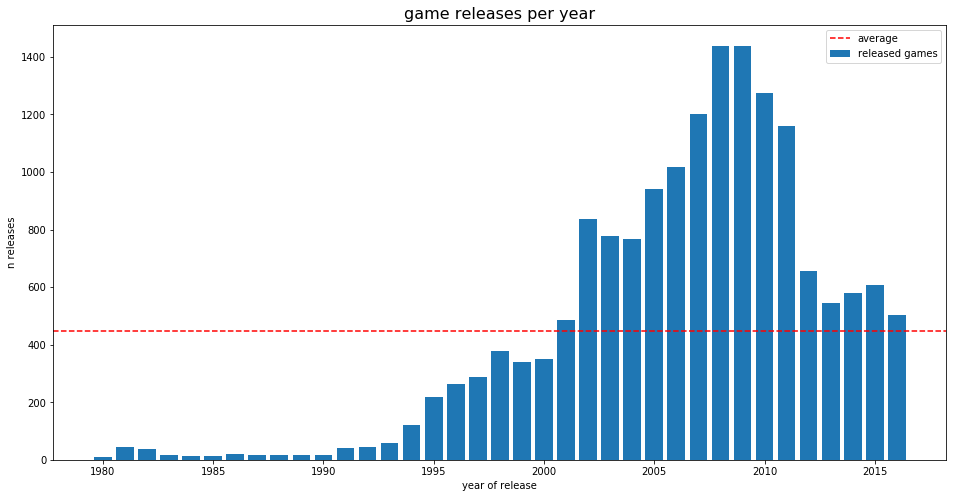

,year,releases
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,18


In [44]:
releases_per_year = games_clean['name'].groupby(games_clean['year_of_release']).count().to_frame()
releases_per_year.reset_index(level=0, inplace=True)
releases_per_year.columns = ['year', 'releases']
releases_per_year = releases_per_year.sort_values(by='year')

releases_per_year_mean = releases_per_year['releases'].mean()

plt.figure(figsize= (16,8))

plt.bar(releases_per_year['year'], releases_per_year['releases'], label= 'released games')
plt.axhline(y= releases_per_year_mean, color= 'red', linestyle='--', label= 'average')
#plt.legend()
plt.title('game releases per year', size= 16)
plt.xlabel('year of release')
plt.ylabel('n releases')
plt.legend()
plt.show()



releases_per_year

It's time for our first graph. We are taking a look at games releases over time. We can also see, as of 2001, the game industrie releases from that point on above average.
While the peak was at 2008 and 2009, we can also see the trend for video games is declining.

<a id='c1'></a>
<a id='c2'></a>

### 4.3  How sales varied from platform to platform

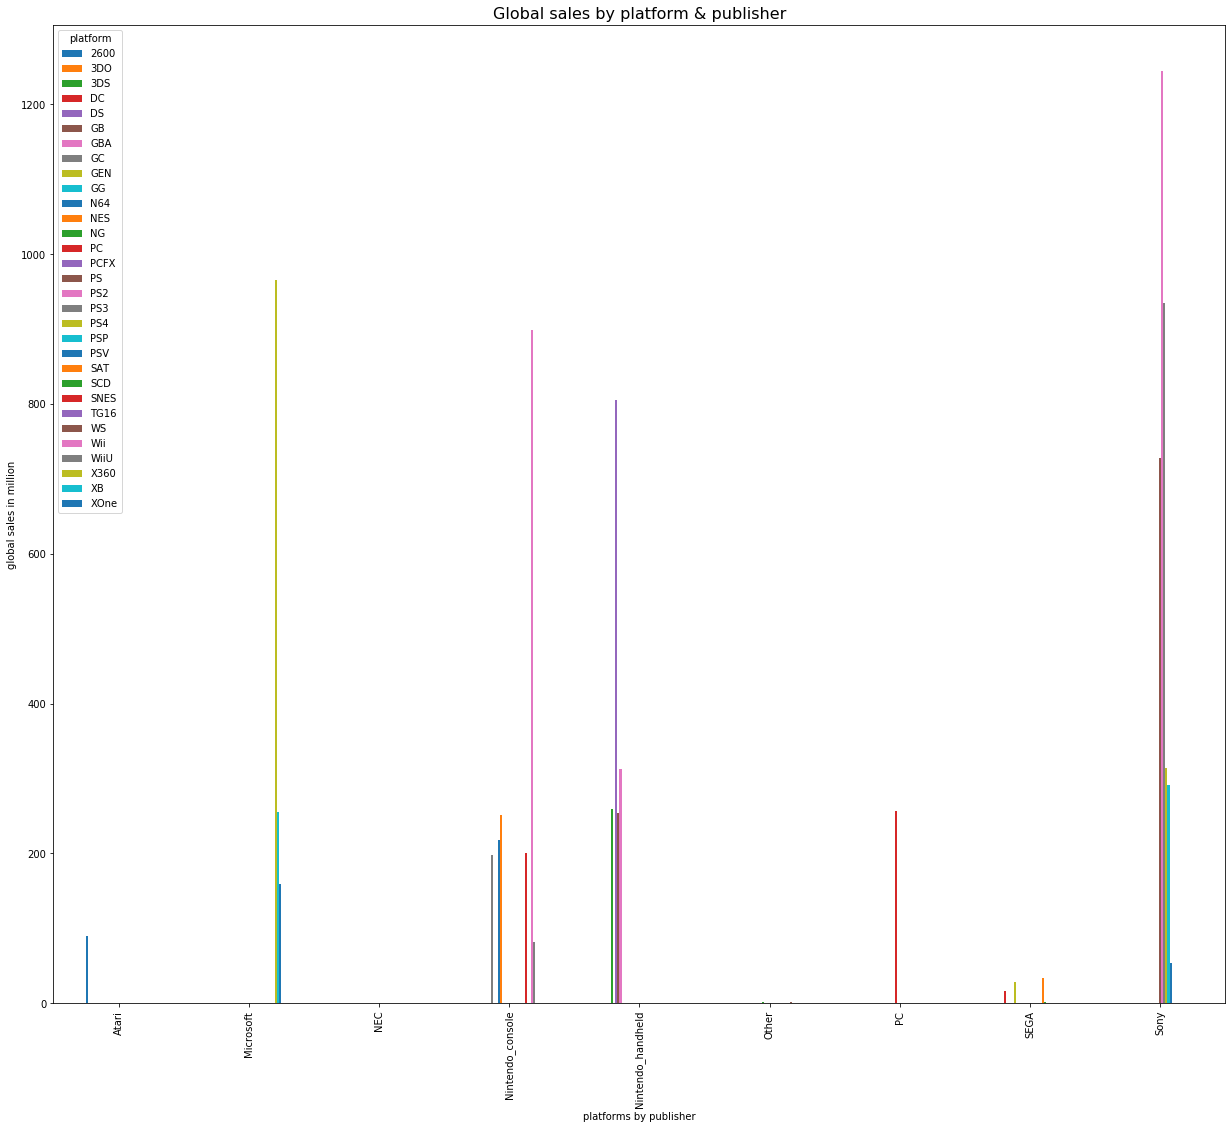

In [45]:
games_clean_pivot = games_clean.pivot_table(
    #games_clean,
    values = 'total_sales',
    index = 'publisher',
    columns = 'platform',
    aggfunc = np.sum
)

ax = games_clean_pivot.plot(kind = 'bar')


fig = ax.get_figure()

fig.set_size_inches(21,18)
ax.set_xlabel('platforms by publisher')
ax.set_ylabel('global sales in million')
ax.set_title('Global sales by platform & publisher', size= 16)

plt.show()

We can see that Sony, Microsoft and Nintendo(both console & handheld) are the dominant player in the market.

<a id='d1'></a>
<a id='d2'></a>

### 4.4  Platform lifetime by publisher

In [46]:
def product_releases(publisher):
    data_list= [publisher]
    games_clean_sv = games_clean[games_clean.publisher.isin(data_list)]

    games_clean_sv.fillna(0)
    
    games_clean_sv1 = games_clean_sv.groupby(['platform','year_of_release'])['genre','total_sales', 'name']\
                                .agg('sum')\
                                .reset_index()\
                                .sort_values('year_of_release')

    
    
    platforms = games_clean_sv1['platform'].unique()
    
    plt.figure(figsize=(18,12))
    colormap = plt.cm.tab20
    plt.gca().set_prop_cycle(plt.cycler('color', colormap(np.linspace(0, 1, 20))))
    
    
    for platform in platforms:
        plt.plot(games_clean_sv1[games_clean_sv1['platform'] == platform]['year_of_release'],
                 games_clean_sv1[games_clean_sv1['platform'] == platform]['total_sales'],
                 linewidth= 2)
    
    # adding titels, labels and legends to the plot and setting parameters 
    plt.xlabel('YEAR', fontsize=16)
    plt.xticks(fontsize=14)
    plt.ylabel('TOTAL SALES IN USD MILLION', fontsize=16)
    plt.yticks(fontsize=14)
    plt.grid(alpha = 0.3)
    plt.title('Product Lifetime per platform for {}'.format(publisher), fontsize=22)
    plt.legend(platforms, fontsize = 10)
    
    plt.axhline(y= 0, color= 'red', linestyle='--', linewidth= 3)


    # displaying the chart
    plt.show()
    print()
    print('Corrosponding table for: {}'.format(publisher))
    print()
    display(games_clean_sv1)
   



In [47]:
def product_lifetime(publisher):
    
    
    games_clean_pl = games_clean[games_clean.publisher.isin([publisher])]
    
    platforms_age = games_clean_pl.groupby(['platform'])['year_of_release'].min().to_frame()
    platforms_age.columns = ['release']
    platforms_age['fade'] = games_clean_pl.groupby(['platform'])['year_of_release'].max().to_frame()
    platforms_age['lifetime'] = platforms_age['fade'] - platforms_age['release']
    print('')
    print('Average prodcut lifetime for {}:'.format(publisher))
    display(platforms_age)
    print('The average of the lifetime is arround {:.0f} years'.format(platforms_age['lifetime'].mean()))

In [48]:
def publisher_info(publisher):
    
    product_releases(publisher)
    print('--------------------')
    product_lifetime(publisher)
    

With those function above, we will see the product lifetime by publisher. Also, at which time the publisher releases his new product and when this outdated one will fade.

<a id='e1'></a>
<a id='e2'></a>

### 4.4.1 Atari

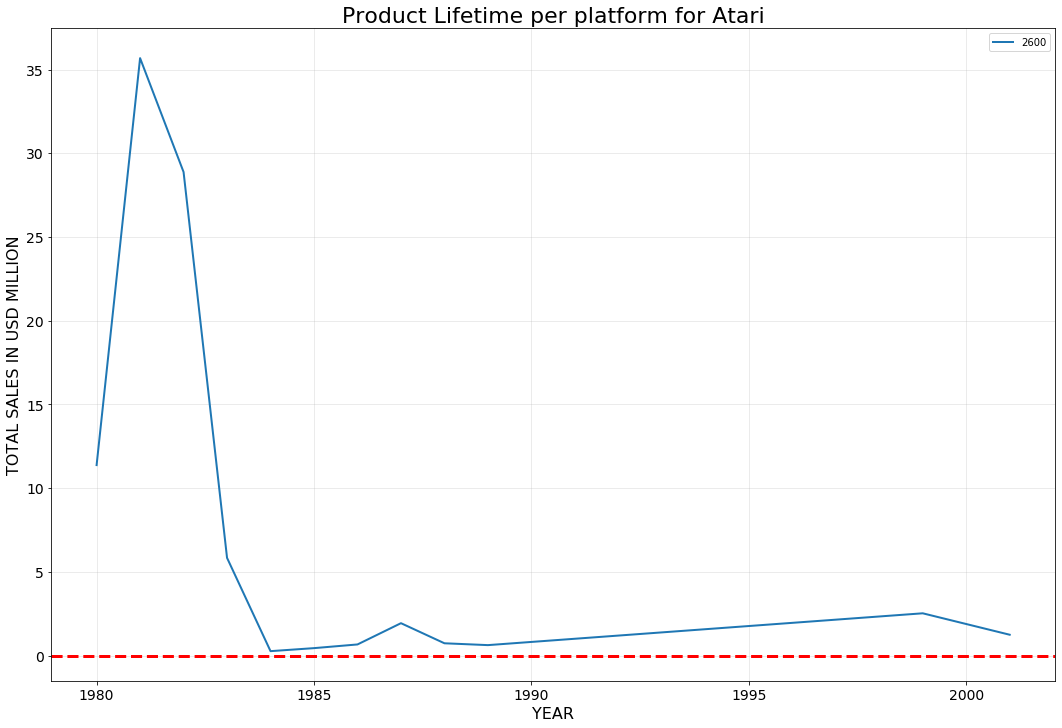


Corrosponding table for: Atari



,platform,year_of_release,total_sales
0,2600,1980.0,11.38
1,2600,1981.0,35.68
2,2600,1982.0,28.88
3,2600,1983.0,5.84
4,2600,1984.0,0.27
5,2600,1985.0,0.45
6,2600,1986.0,0.67
7,2600,1987.0,1.94
8,2600,1988.0,0.74
9,2600,1989.0,0.63


--------------------

Average prodcut lifetime for Atari:


,release,fade,lifetime
platform,,,
2600,1980.0,2001.0,21.0


The average of the lifetime is arround 21 years


In [49]:
publisher_info('Atari')

While Atari has an impressiv lifespan, the sales could be descriped as a collectors product.

<a id='f1'></a>
<a id='f2'></a>

### 4.4.2 Microsoft (Xbox)

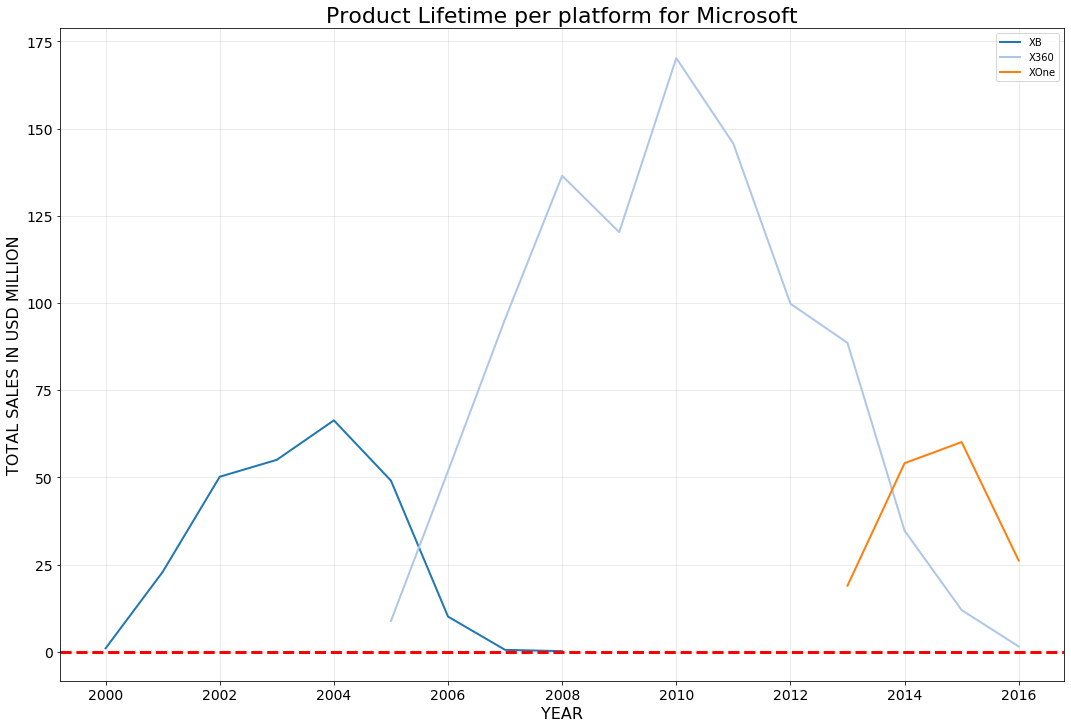


Corrosponding table for: Microsoft



,platform,year_of_release,total_sales
12,XB,2000.0,0.99
13,XB,2001.0,22.90
14,XB,2002.0,50.19
15,XB,2003.0,55.04
16,XB,2004.0,66.36
17,XB,2005.0,49.08
0,X360,2005.0,8.83
18,XB,2006.0,10.09
1,X360,2006.0,51.80
19,XB,2007.0,0.55


--------------------

Average prodcut lifetime for Microsoft:


,release,fade,lifetime
platform,,,
X360,2005.0,2016.0,11.0
XB,2000.0,2008.0,8.0
XOne,2013.0,2016.0,3.0


The average of the lifetime is arround 7 years


In [50]:
publisher_info('Microsoft')

This chart visualizes a perfect example of a platform lifecylce.

<a id='g1'></a>
<a id='g2'></a>

### 4.4.3 Nintendo

#### Nintendo Consoles

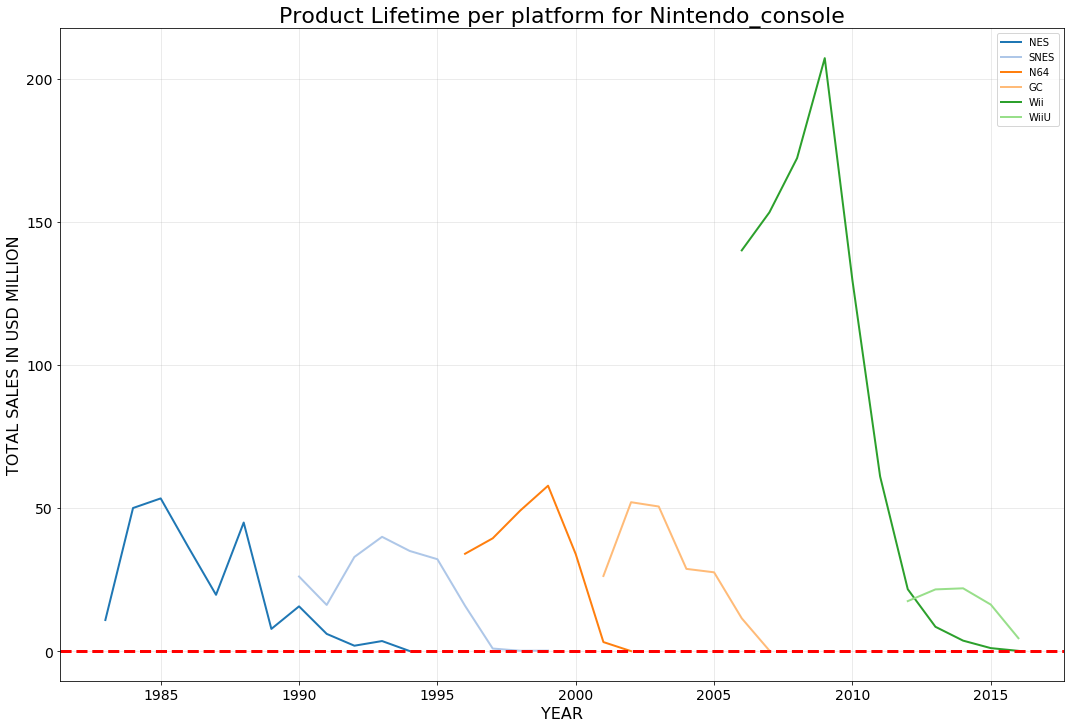


Corrosponding table for: Nintendo_console



,platform,year_of_release,total_sales
14,NES,1983.0,10.96
15,NES,1984.0,50.08
16,NES,1985.0,53.44
17,NES,1986.0,36.41
18,NES,1987.0,19.76
19,NES,1988.0,45.01
20,NES,1989.0,7.85
26,SNES,1990.0,26.15
21,NES,1990.0,15.73
22,NES,1991.0,6.11


--------------------

Average prodcut lifetime for Nintendo_console:


,release,fade,lifetime
platform,,,
GC,2001.0,2007.0,6.0
N64,1996.0,2002.0,6.0
NES,1983.0,1994.0,11.0
SNES,1990.0,1999.0,9.0
Wii,2006.0,2016.0,10.0
WiiU,2012.0,2016.0,4.0


The average of the lifetime is arround 8 years


In [53]:
publisher_info('Nintendo_console')

While Wii was sky rocketing on his launch, the sales brokes all of a sudden. There might be a reason for this

#### Nintendo Handheld

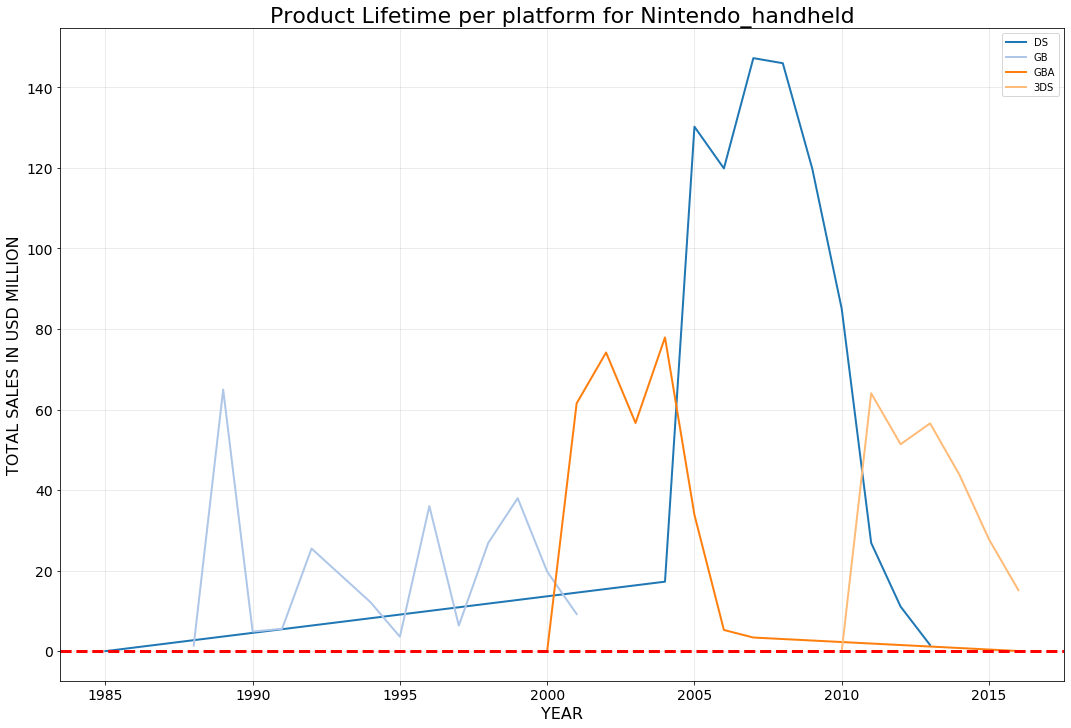


Corrosponding table for: Nintendo_handheld



,platform,year_of_release,total_sales
7,DS,1985.0,0.02
18,GB,1988.0,1.43
19,GB,1989.0,64.97
20,GB,1990.0,4.89
21,GB,1991.0,5.57
22,GB,1992.0,25.49
23,GB,1994.0,12.18
24,GB,1995.0,3.60
25,GB,1996.0,36.03
26,GB,1997.0,6.37


--------------------

Average prodcut lifetime for Nintendo_handheld:


,release,fade,lifetime
platform,,,
3DS,2010.0,2016.0,6.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
GBA,2000.0,2016.0,16.0


The average of the lifetime is arround 16 years


In [54]:
publisher_info('Nintendo_handheld')

First of all, GB had to be summerized with GameBoy Color. This should explain the tremandously high lifespan of the product. Secondly, the data seems a bit corrupted here.

<a id='h1'></a>
<a id='h2'></a>

### 4.4.4 Other publisher

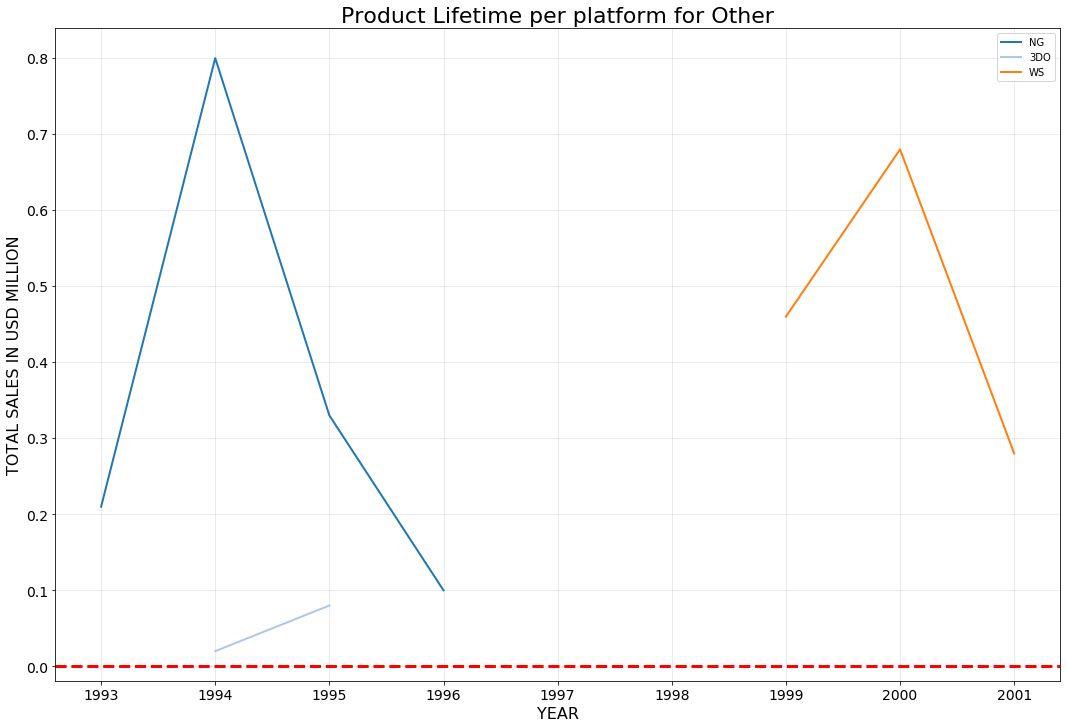


Corrosponding table for: Other



,platform,year_of_release,total_sales
2,NG,1993.0,0.21
0,3DO,1994.0,0.02
3,NG,1994.0,0.80
1,3DO,1995.0,0.08
4,NG,1995.0,0.33
5,NG,1996.0,0.10
6,WS,1999.0,0.46
7,WS,2000.0,0.68
8,WS,2001.0,0.28


--------------------

Average prodcut lifetime for Other:


,release,fade,lifetime
platform,,,
3DO,1994.0,1995.0,1.0
NG,1993.0,1996.0,3.0
WS,1999.0,2001.0,2.0


The average of the lifetime is arround 2 years


In [55]:
publisher_info('Other')

Not even worth mentioning

<a id='i1'></a>
<a id='i2'></a>

### 4.4.5 PC

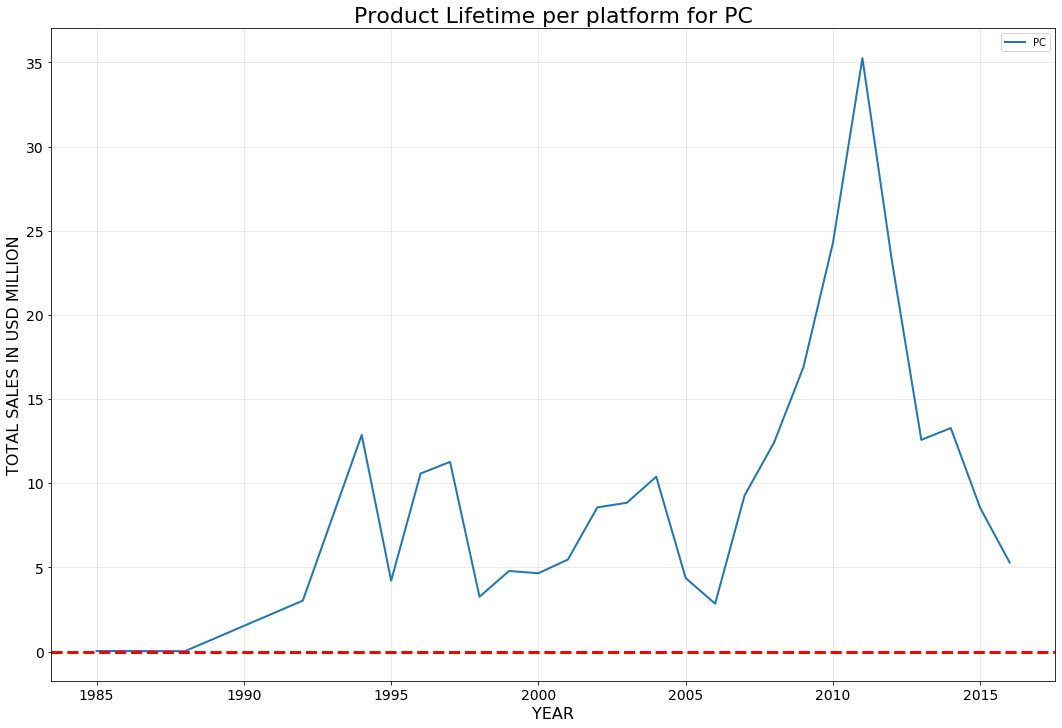


Corrosponding table for: PC



,platform,year_of_release,total_sales
0,PC,1985.0,0.04
1,PC,1988.0,0.03
2,PC,1992.0,3.03
3,PC,1994.0,12.87
4,PC,1995.0,4.22
5,PC,1996.0,10.58
6,PC,1997.0,11.27
7,PC,1998.0,3.26
8,PC,1999.0,4.79
9,PC,2000.0,4.66


--------------------

Average prodcut lifetime for PC:


,release,fade,lifetime
platform,,,
PC,1985.0,2016.0,31.0


The average of the lifetime is arround 31 years


In [56]:
publisher_info('PC')

Out of all platforms, PCs have the consinstant lifespan. Due to the platforms nature, PC games should be a stable in every game store.

<a id='j1'></a>
<a id='j2'></a>

### 4.4.6 SEGA

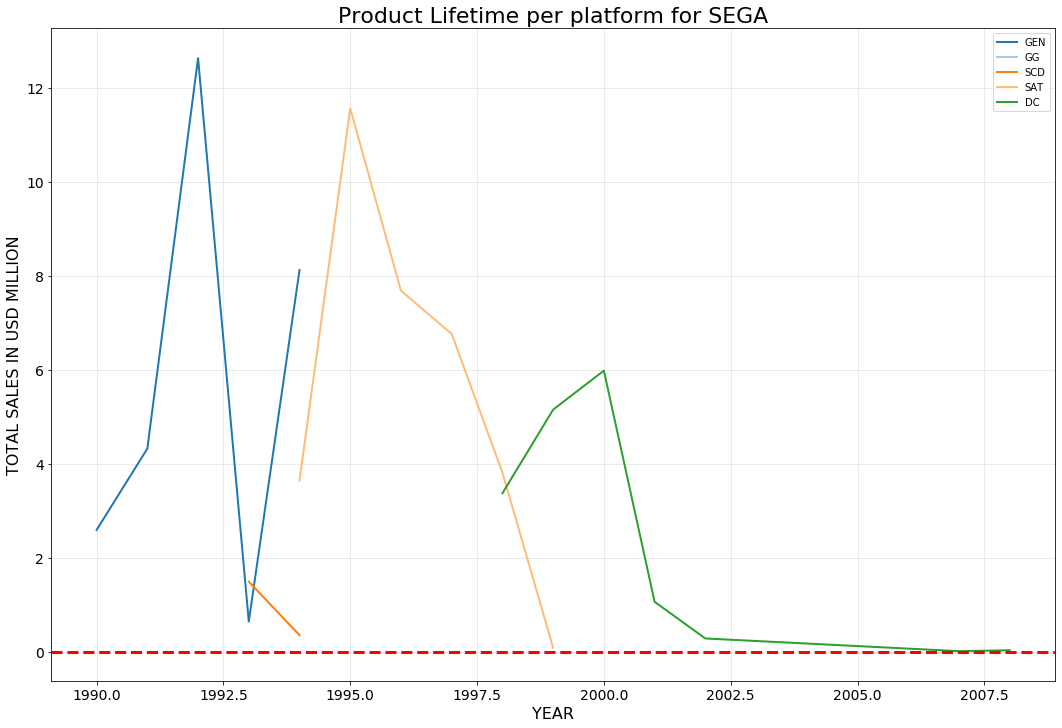


Corrosponding table for: SEGA



,platform,year_of_release,total_sales
7,GEN,1990.0,2.60
8,GEN,1991.0,4.33
12,GG,1992.0,0.04
9,GEN,1992.0,12.64
10,GEN,1993.0,0.65
19,SCD,1993.0,1.50
13,SAT,1994.0,3.65
11,GEN,1994.0,8.13
20,SCD,1994.0,0.36
14,SAT,1995.0,11.57


--------------------

Average prodcut lifetime for SEGA:


,release,fade,lifetime
platform,,,
DC,1998.0,2008.0,10.0
GEN,1990.0,1994.0,4.0
GG,1992.0,1992.0,0.0
SAT,1994.0,1999.0,5.0
SCD,1993.0,1994.0,1.0


The average of the lifetime is arround 4 years


In [57]:
publisher_info('SEGA')

While SEGA platforms wasn't so successfull, SEGA developed to an Games developing Studio, after they dropped their platform unit.

<a id='k1'></a>
<a id='k2'></a>

### 4.4.7 Sony

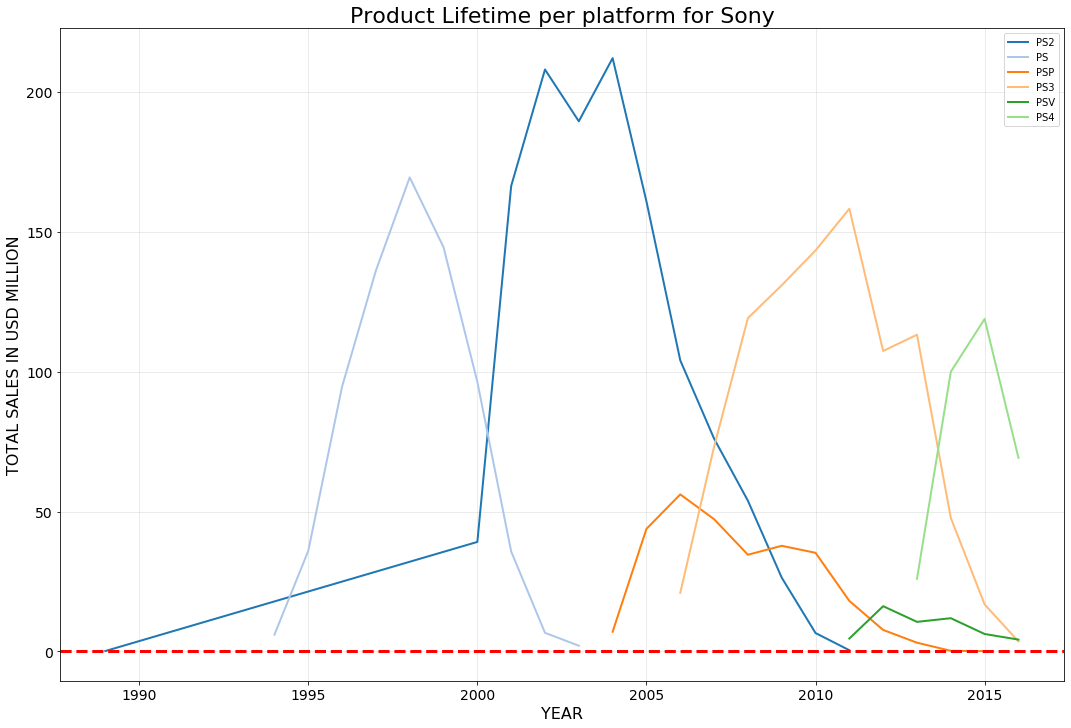


Corrosponding table for: Sony



,platform,year_of_release,total_sales
10,PS2,1989.0,0.17
0,PS,1994.0,6.03
1,PS,1995.0,35.96
2,PS,1996.0,94.70
3,PS,1997.0,136.17
4,PS,1998.0,169.49
5,PS,1999.0,144.53
6,PS,2000.0,96.37
11,PS2,2000.0,39.17
7,PS,2001.0,35.75


--------------------

Average prodcut lifetime for Sony:


,release,fade,lifetime
platform,,,
PS,1994.0,2003.0,9.0
PS2,1989.0,2011.0,22.0
PS3,2006.0,2016.0,10.0
PS4,2013.0,2016.0,3.0
PSP,2004.0,2015.0,11.0
PSV,2011.0,2016.0,5.0


The average of the lifetime is arround 10 years


In [58]:
publisher_info('Sony')

We can see that the PS2 was the most successfull platform for Sony. However, it seems a bit unrealistic for that platform, to be released even before the PS (One). There might be some errors in our dataset.

<a id='l1'></a>
<a id='l2'></a>

### 4.4.8 Final picture on product lifetime

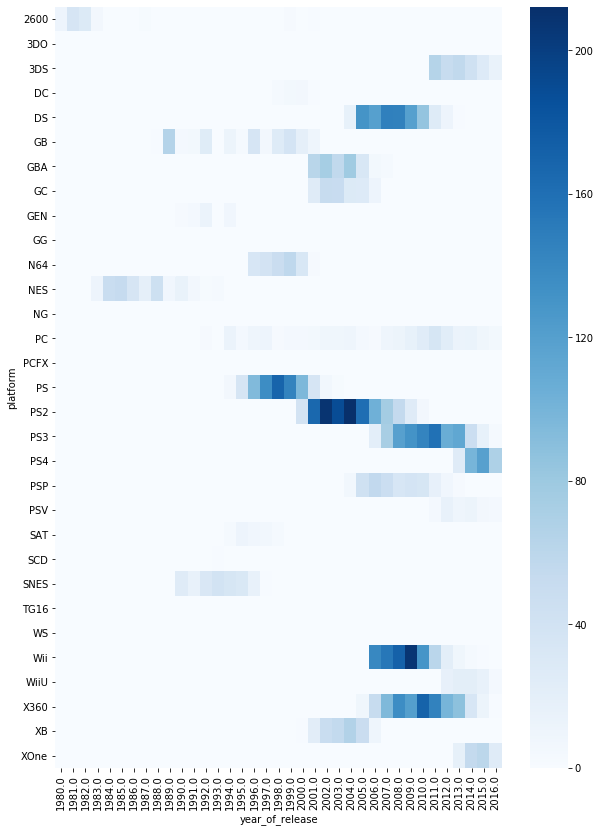

In [59]:
platform_sales_per_year = games_clean.pivot_table(values='total_sales',
                                                  index=['platform'],
                                                  columns=['year_of_release'],
                                                  aggfunc=np.sum
).fillna(0)

platform_sales_per_year
plt.figure(figsize=(10, 14))
sns.heatmap(platform_sales_per_year, cmap= 'Blues')

plt.show()

Compared with PS2, Wii was the only platform in sales to reach near the sales of PS2.

<a id='m1'></a>
<a id='m2'></a>

### 4.4.9 Average lifetime of a platform

In [60]:
platforms_sales_per_month1 = games_clean.groupby(['year_of_release','platform'])['total_sales'].sum().to_frame()
platforms_sales_per_month1.reset_index(level=0, inplace=True)
platforms_sales_per_month1.sort_values(by= ['platform','year_of_release'], ascending = True, inplace= True)
    
    
    ###CLEAR!
    
platforms_age = platforms_sales_per_month1.groupby('platform')['year_of_release'].min().to_frame()
    #platforms_age.reset_index(level=0, inplace=True)
platforms_age.columns = ['release']
platforms_age['fade'] = platforms_sales_per_month1.groupby('platform')['year_of_release'].max()
platforms_age['lifetime'] = platforms_age['fade'] - platforms_age['release']
    
overall_lifetime = platforms_age['lifetime'].mean()

overall_lifetime_f = round(overall_lifetime)
print('The publisher-wide product lifetime lasts about {} years'.format(overall_lifetime_f))
    

The publisher-wide product lifetime lasts about 9 years


We calculated the average lifetime for each platform earlier on. However, the average publisherwide is about 9 years. Within this period, a platform would reach is climax at 4-5 years of their product lifetime.

In [61]:
limiter_frame = games_clean['year_of_release'].max()
#limiter_frame.reset_index(level=0, inplace=True)
    
limiter_removal = limiter_frame - overall_lifetime_f
    
placeholder = games_clean.query('year_of_release >= @limiter_removal')
    

## try and error hier mit placeholder weitermachen
platform_sales4 = placeholder.groupby(placeholder['platform'])['total_sales'].sum().to_frame()
platform_sales4.reset_index(level=0, inplace=True)
platform_sales4.columns = ['platform', 'sales_in_mil']
platform_sales4=platform_sales4.sort_values(by='sales_in_mil', ascending=False).reset_index(drop=True)
#platform_sales

platforms_sales_per_month3 = placeholder.groupby(['platform','year_of_release'])['total_sales'].sum().to_frame()
platforms_sales_per_month3.reset_index(level=0, inplace=True)
platforms_sales_per_month3.reset_index(level=0, inplace=True)

current_platforms = platforms_sales_per_month3[platforms_sales_per_month3['year_of_release']== 2016]['platform'].tolist()
unpopular_platforms = platform_sales4.query("sales_in_mil > 100 ")['platform'].unique().tolist()




games_clean_sv3 = placeholder[placeholder.platform.isin(unpopular_platforms)]
games_clean_sv3.fillna(0)
    

display(unpopular_platforms)

['PS3', 'X360', 'Wii', 'DS', 'PS4', '3DS', 'PSP', 'PS2', 'PC', 'XOne']

<a id='n1'></a>
<a id='n2'></a>

### 4.5 Game releases per platform per publisher

In [62]:
def release_insight(publisher):
    
    games_clean_sv5 = games_clean_sv3[games_clean_sv3.publisher.isin([publisher])]

    games_clean_sv5.fillna(0)

    
    old_popular_platforms1 = games_clean_sv5['platform'].unique().tolist()
    
    for element in old_popular_platforms1:
        games_clean_sv5[games_clean_sv5['platform'] == element].groupby(games_clean_sv5['year_of_release'])['total_sales'].count().to_frame().plot.bar(title = element)
        plt.xlabel("releases on years")
        plt.ylabel("n games")
        
        

In [63]:
def release_insight2(publisher, year):
    
    games_clean_sv6 = games_clean_sv3[games_clean_sv3.publisher.isin([publisher])]

    games_clean_sv6.fillna(0)

    
    old_popular_platforms2 = games_clean_sv6[games_clean_sv6['year_of_release']== 2016]['platform'].unique().tolist()
    
    print('Game releases on {}s popular platforms in {}, based on total sales'.format(publisher, year))
    
    releases_per_year_mean = releases_per_year['releases'].mean()

    #plt.figure(figsize= (16,8))

    
    for element in old_popular_platforms2:
        

        a = games_clean_sv6[games_clean_sv6['platform'] == element].groupby(games_clean_sv6['year_of_release'])['total_sales'].count().to_frame()
        a_mean = a['total_sales'].mean()
        
        a.plot.bar(title = element)
        plt.axhline(y= a_mean, color= 'red', linestyle='--', label= 'average releases')
        plt.ylabel("n games")
        plt.xlabel("releases on years")
        plt.subplot(111).legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
        plt.show()
        
        
        b = games_clean_sv6[games_clean_sv6['platform'] == element].groupby(games_clean_sv6['year_of_release'])['total_sales'].sum().to_frame()
        b_mean = b['total_sales'].mean()
        
        b.plot.bar(title = element, color= 'green')
        plt.axhline(y= b_mean, color= 'red', linestyle='--', label= 'average sales')
        plt.xlabel("releases on years")
        plt.ylabel("sum of total sales")
        plt.subplot(111).legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
        plt.show()
        

    
    
    

<a id='o1'></a>
<a id='o2'></a>

### 4.5.1 Game releases per platform per publisher on average platform lifetime

<a id='p1'></a>
<a id='p2'></a>

### 4.5.1.1 for Microsoft

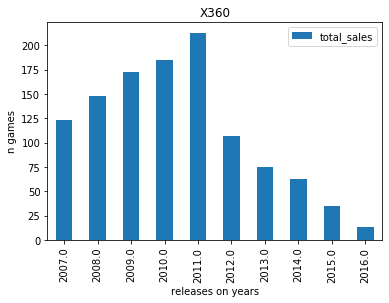

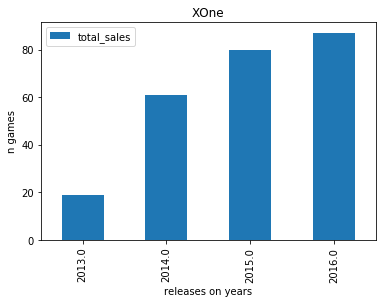

In [64]:
release_insight('Microsoft')

<a id='q1'></a>
<a id='q2'></a>

### 4.5.1.2 for Nintendo

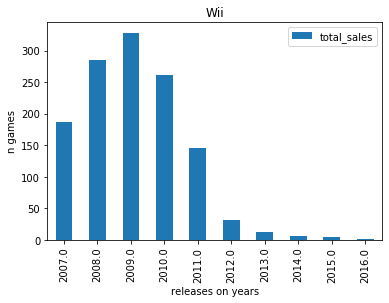

In [65]:
release_insight('Nintendo_console')

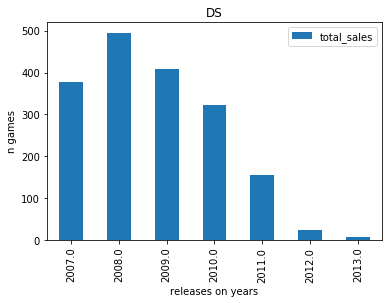

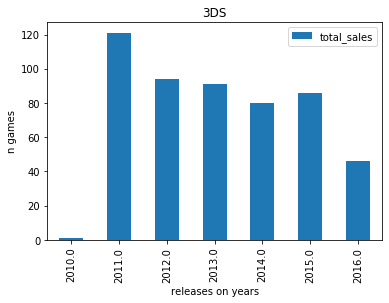

In [66]:
release_insight('Nintendo_handheld')

<a id='r1'></a>
<a id='r2'></a>

### 4.5.1.3 for PC

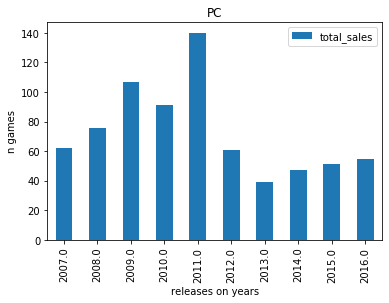

In [67]:
release_insight('PC')

<a id='s1'></a>
<a id='s2'></a>

### 4.5.1.4 for Sony

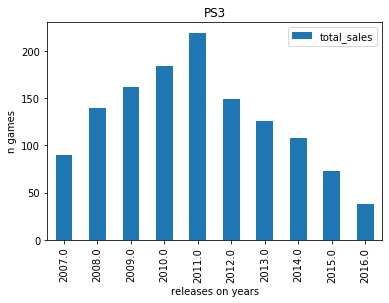

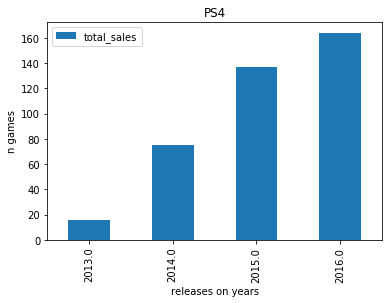

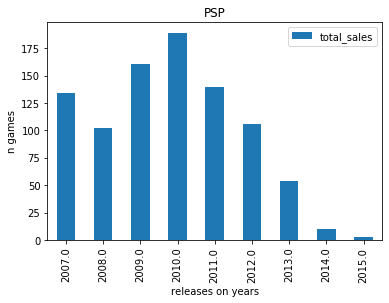

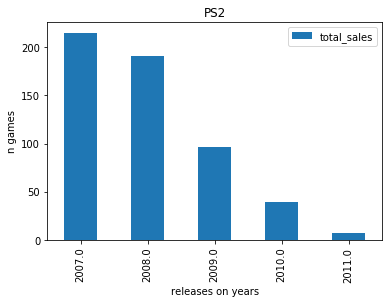

In [68]:
release_insight('Sony')

<a id='t1'></a>
<a id='t2'></a>

### 4.5.2. Game releases and sales for popular platforms

<a id='u1'></a>
<a id='u2'></a>

### 4.5.2.1 for Microsoft

Game releases on Microsofts popular platforms in 2016, based on total sales


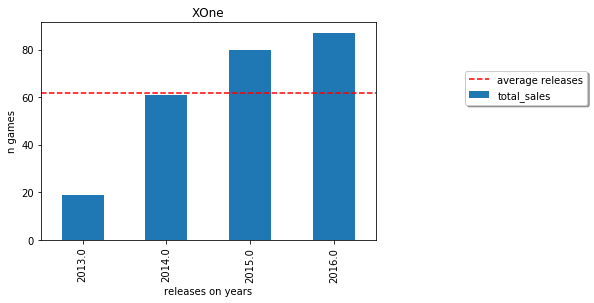

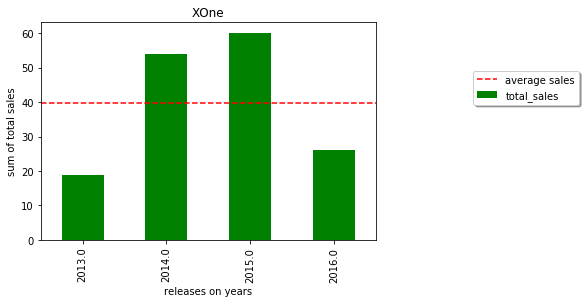

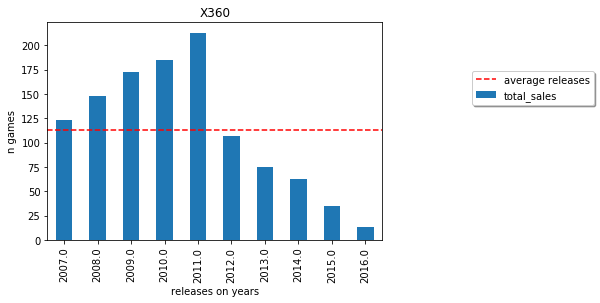

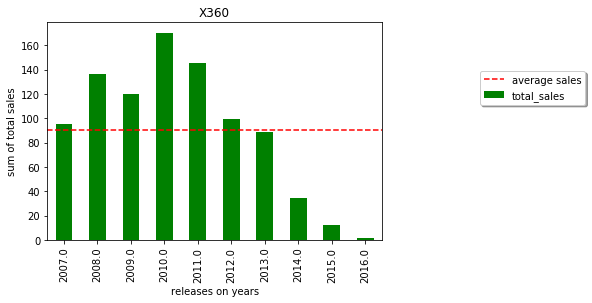

In [69]:
release_insight2('Microsoft', '2016')

<a id='v1'></a>
<a id='v2'></a>

### 4.5.2.2 for Nintendo

Game releases on Nintendo_consoles popular platforms in 2016, based on total sales


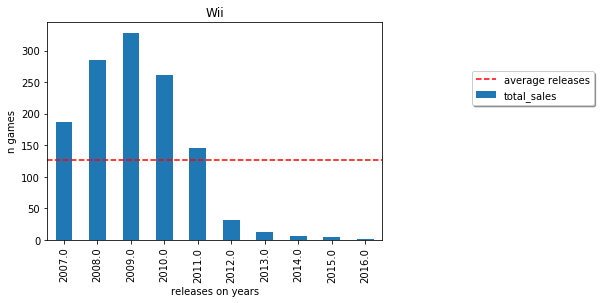

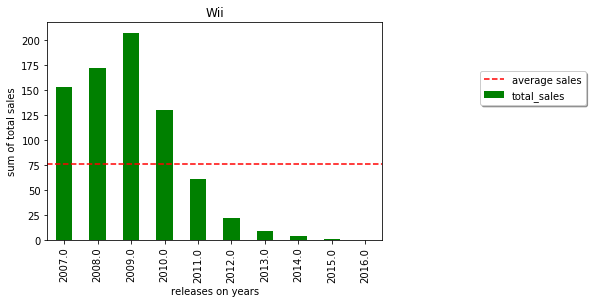

In [70]:
release_insight2('Nintendo_console', '2016')

Game releases on Nintendo_handhelds popular platforms in 2016, based on total sales


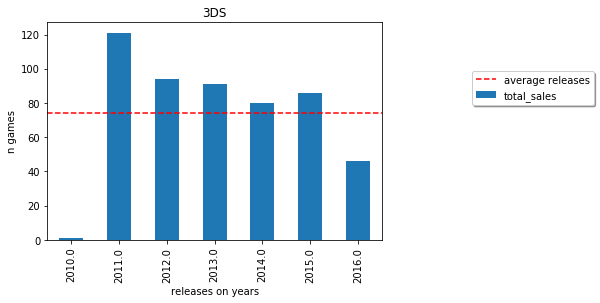

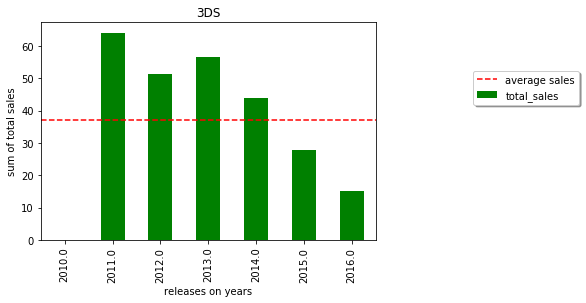

In [71]:
release_insight2('Nintendo_handheld', '2016')

<a id='w1'></a>
<a id='w2'></a>

### 4.5.2.3 for PC

Game releases on PCs popular platforms in 2016, based on total sales


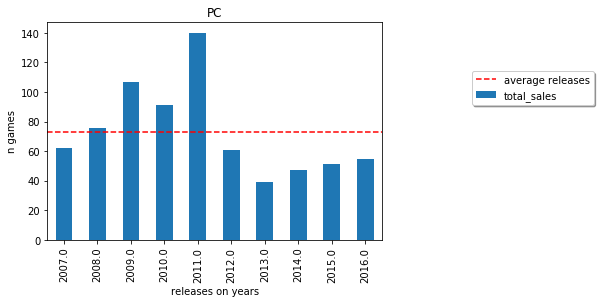

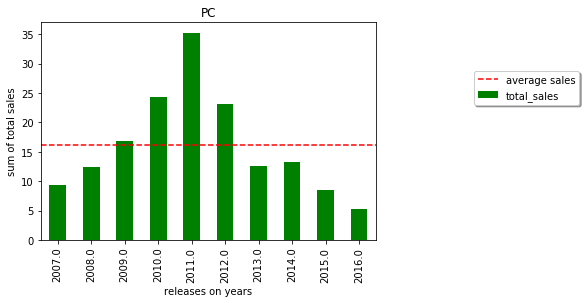

In [72]:
release_insight2('PC', '2016')

<a id='x1'></a>
<a id='x2'></a>

### 4.5.2.4 for Sony

Game releases on Sonys popular platforms in 2016, based on total sales


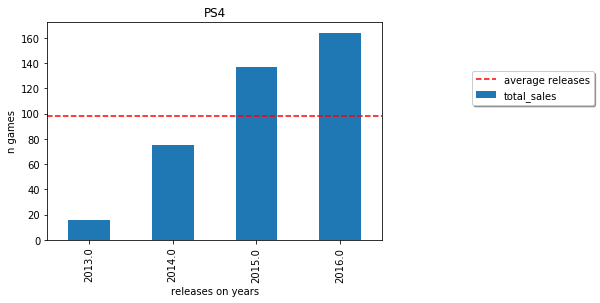

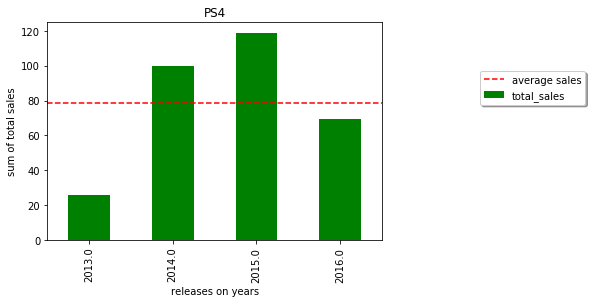

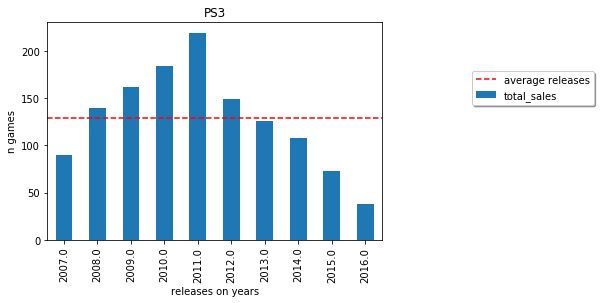

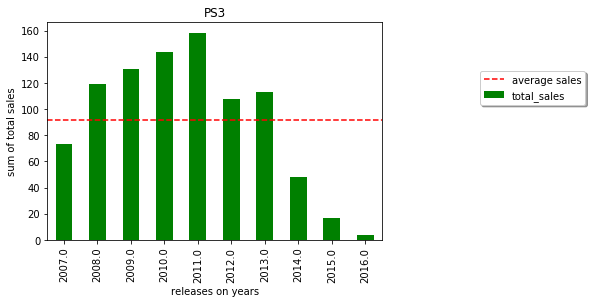

In [73]:
release_insight2('Sony', '2016')

<a id='y1'></a>
<a id='y2'></a>

### 4.6 Box plot for the global sales of all games, broken down by platform

PS3


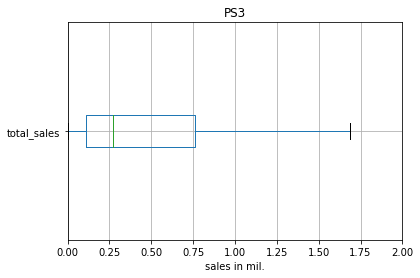

X360


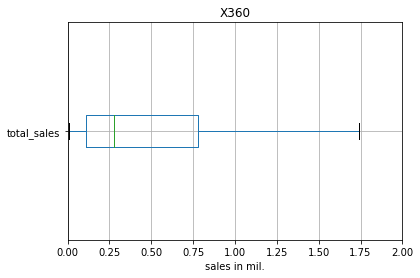

Wii


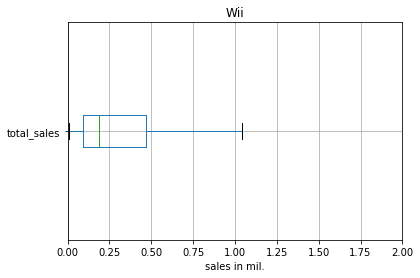

DS


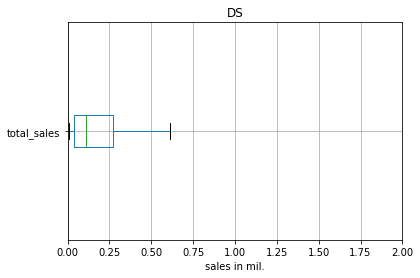

PS4


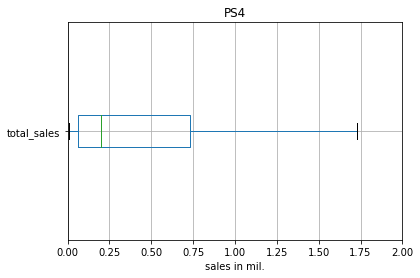

In [74]:
i_mean = platform_sales4['sales_in_mil'].mean()

popular_platforms = platform_sales4.query("sales_in_mil > @i_mean ")['platform'].tolist()
for element in popular_platforms:
    print(element)
    games_clean_sv3[games_clean_sv3['platform']== element].groupby(games_clean_sv3['name'])['total_sales'].sum().to_frame().boxplot(vert=False,showfliers=False).set_title(element)
    plt.xlim(0, 2)
    plt.xlabel('sales in mil.')
    plt.show()
    


<a id='z1'></a>
<a id='z2'></a>

### 4.7 Impact of user and professional reviews on sales for PS4. 

In [75]:
def review_impact(platform):

    platform_reviews_sales = games_clean_sv3.query("platform == @platform and critic_score != 'unknown' and user_score != 'unknown'")[['total_sales','critic_score','user_score']]
    platform_reviews_sales.head(15).sort_values(by= 'total_sales', ascending= False)

    platform_reviews_sales['critic_score'] = pd.to_numeric(platform_reviews_sales['critic_score'], errors='coerce')
    platform_reviews_sales['user_score'] = pd.to_numeric(platform_reviews_sales['user_score'], errors='coerce')
    platform_reviews_sales['user_score'] = platform_reviews_sales['user_score']*10
    pd.to_numeric(platform_reviews_sales['user_score'], errors='coerce')
    #platform_reviews_sales.info()


    plt.figure(figsize=(16, 12))


    #plt.subplot(1,2,1)
    plt.scatter(platform_reviews_sales['total_sales'], platform_reviews_sales['critic_score'], color = "slategray", alpha = 0.7, label= 'professional review')
    plt.scatter(platform_reviews_sales['total_sales'], platform_reviews_sales['user_score'], color = "skyblue", alpha = 0.7,  label= 'users review')
    plt.title(('critic scores impact on sales for {}'.format(platform)), fontsize=30)
    plt.suptitle("")
    plt.grid()
    plt.legend()
    plt.xlabel(('total_sales in USD million'), fontsize= 15)
    plt.ylabel(('critic_score'), fontsize = 15)

    plt.show()   
    
    print()
    print('Correlation for {}:'.format(platform))
    print()
    print('- for critic_score and total sales:',platform_reviews_sales['critic_score'].corr(platform_reviews_sales['total_sales']))
    print('- for user_score and total sales:',platform_reviews_sales['user_score'].corr(platform_reviews_sales['total_sales']))
    


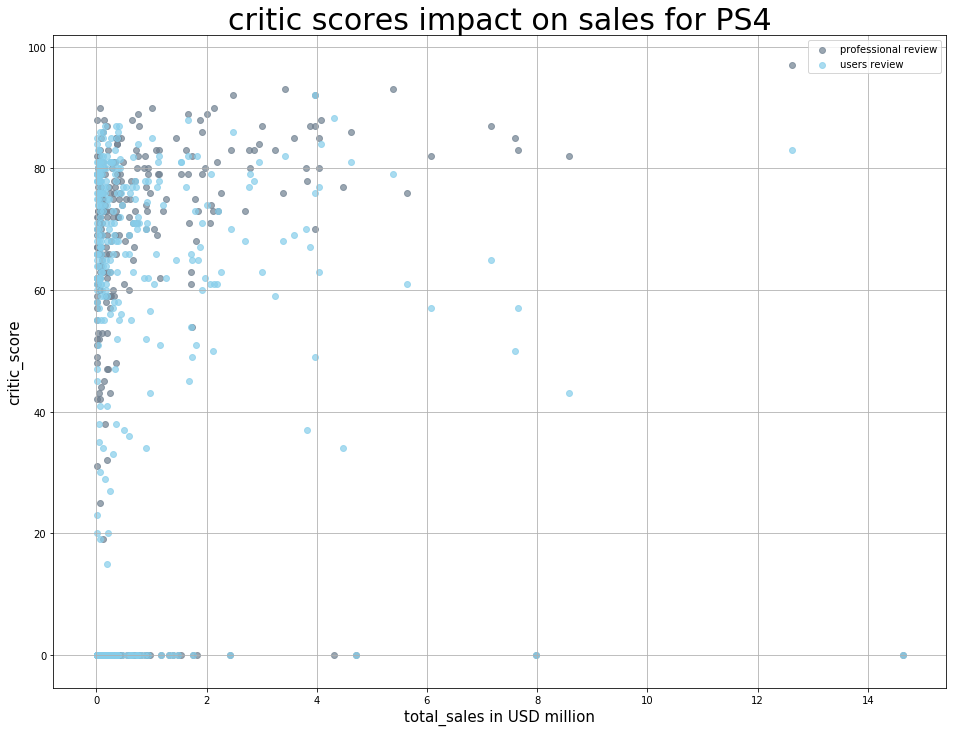


Correlation for PS4:

- for critic_score and total sales: 0.22754960627752652
- for user_score and total sales: 0.11857015371806626


In [76]:
review_impact('PS4')

<a id='aa1'></a>
<a id='aa2'></a>

### 4.7.1 Comperisson to competitve platforms

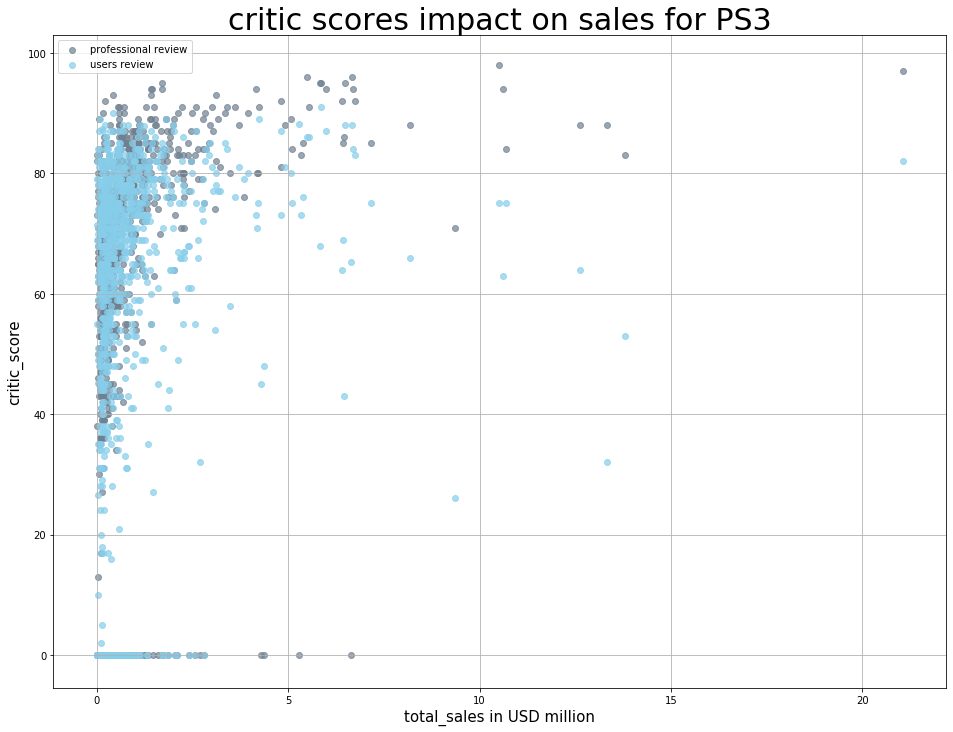


Correlation for PS3:

- for critic_score and total sales: 0.35310015913347403
- for user_score and total sales: 0.2785698194533256


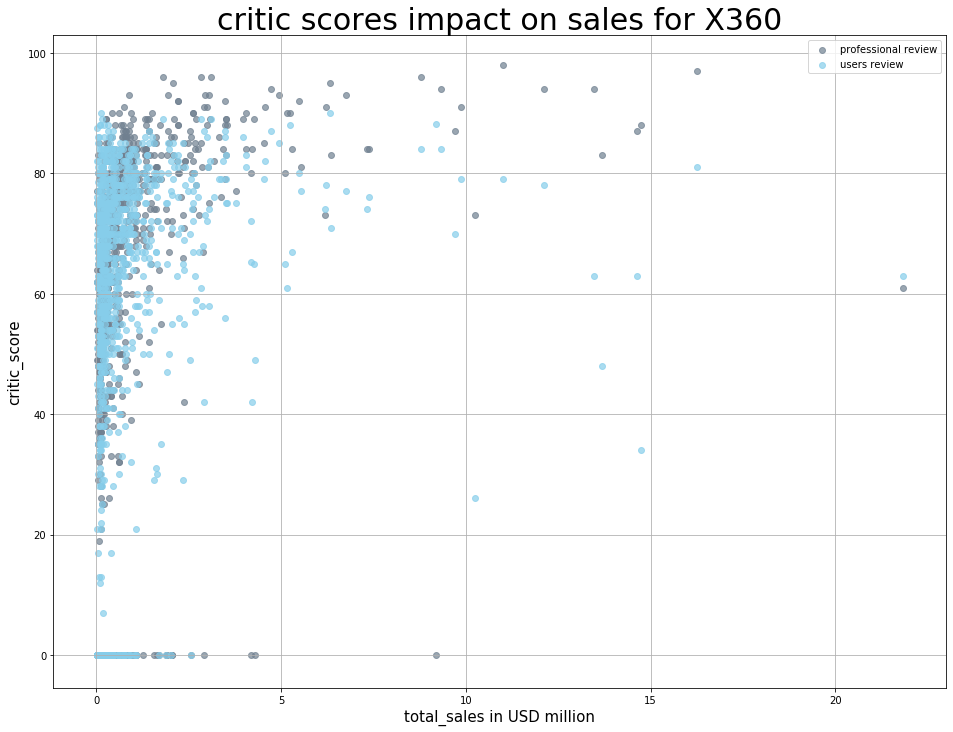


Correlation for X360:

- for critic_score and total sales: 0.31646856790758704
- for user_score and total sales: 0.22352509460096745


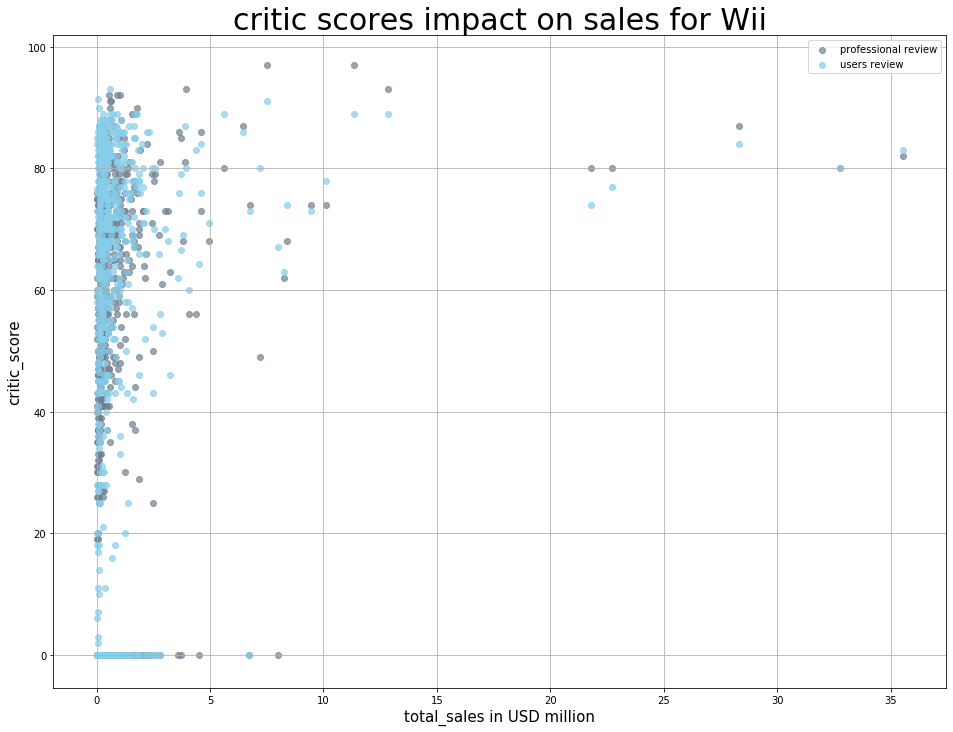


Correlation for Wii:

- for critic_score and total sales: 0.23412664626623342
- for user_score and total sales: 0.23350551715458434


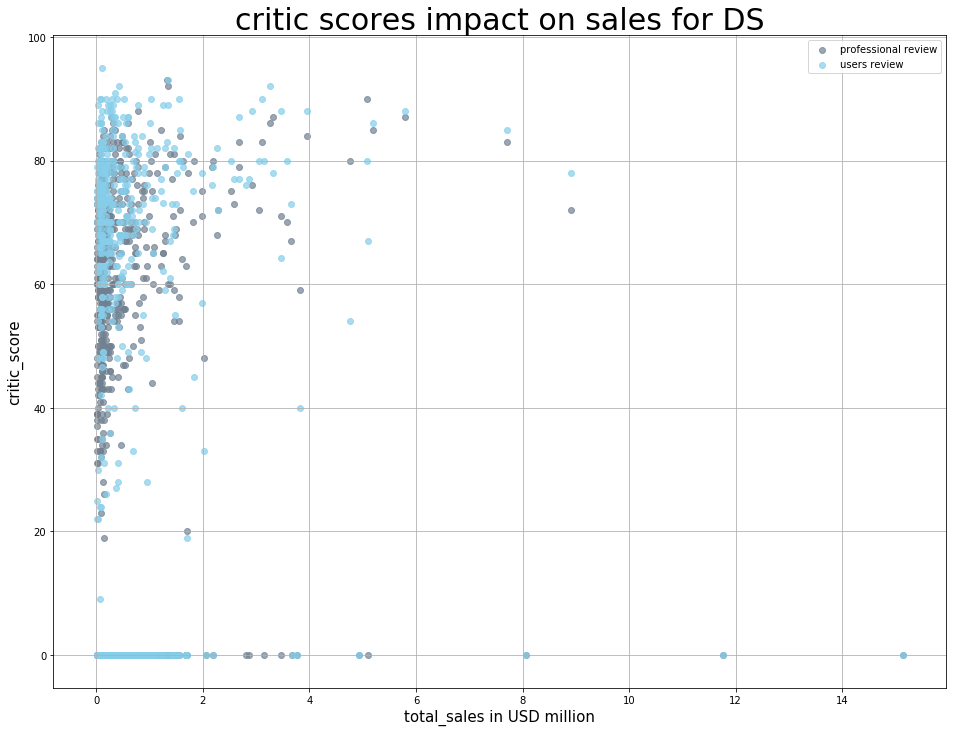


Correlation for DS:

- for critic_score and total sales: 0.19660402642379465
- for user_score and total sales: 0.2536813591417376


In [77]:
del popular_platforms[4]

for element in popular_platforms:
    review_impact(element)

<a id='ab1'></a>
<a id='ab2'></a>

### 4.8 General distribution of games by genre

,genre,sum,count,per_game
0,Action,1020.42,1998,0.510721
8,Shooter,669.16,655,1.021618
10,Sports,652.84,1099,0.594031
3,Misc,472.79,1108,0.426706
7,Role-Playing,450.09,797,0.564730
6,Racing,255.23,478,0.533954
4,Platform,206.44,263,0.784943
9,Simulation,199.56,552,0.361522
2,Fighting,157.14,338,0.464911
1,Adventure,126.03,857,0.147060


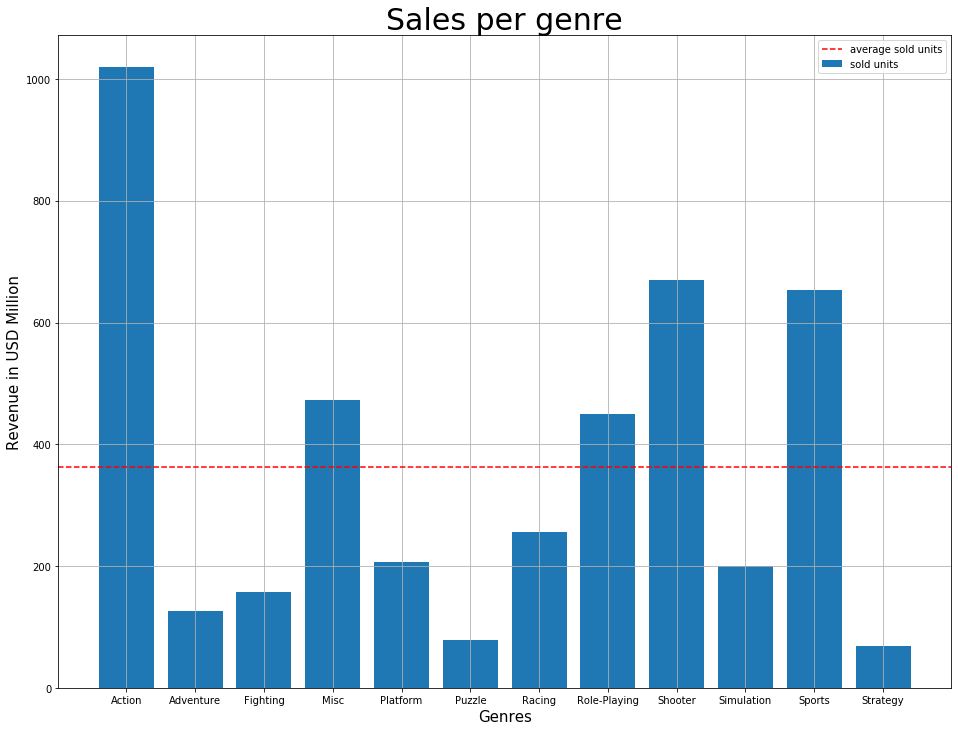

In [78]:
genre_sales = games_clean_sv3.groupby('genre')['total_sales'].agg(['sum','count'])
genre_sales['per_game'] = genre_sales['sum']/genre_sales['count']
genre_sales.reset_index(level=0, inplace=True)
display(genre_sales.sort_values(by='sum', ascending=False))

genre_sales_mean = genre_sales['sum'].mean()

plt.figure(figsize=(16, 12))

plt.bar(genre_sales['genre'], genre_sales['sum'], label= 'sold units')
plt.axhline(y= genre_sales_mean, color= 'red', linestyle='--', label= 'average sold units')
plt.title('Sales per genre' , fontsize=30)
plt.suptitle("")
plt.grid()
plt.legend()
plt.xlabel(('Genres'), fontsize= 15)
plt.ylabel(('Revenue in USD Million'), fontsize = 15)

plt.show()   


<a id='ac1'></a>
<a id='ac2'></a>

### 4.9 Chapter Conclusion

[Back to top](#top) | [Back to Chapterstart: Data Analysis](#Analysis2)

---

<a id='UserProfile1'></a>
<a id='UserProfile2'></a>

## 5. User Profiling

As we noted in the previous chapter, the average product lifecycle of a player platform is 9 years. We have also seen that a platform takes about 4 years to reach peak revenue.
In this chapter, we look at the sales markets

- North America
- Europe
- Japan

as our key sales markets.

To do this, we profile each market, showing us the market share of each popular platform, 
which genres are most profitable over time to peak sales, the impact of the ESRB rating on game sales, and finally, which 10 titles have sold the best over the last 3 years.

To do this, we first create individual functions for each KPI by region and then combine all the graphs created into one function.

#### Quick Links:
[5.1 Preperations for plotting the Dashboards](#PrepDash2) 
>[5.1.1 Marketshare per Region](#MarketShare2) <br>
>[5.1.2 Genre profit quadrant per region](#ProfitQuadrant2) <br>
>[5.1.3 Rating impact on revenue](#ror2) <br>
>[5.1.4 Top 10 Games](#Top10G2) <br>
>[5.1.5 Dashboard Title](#DashTitle2) <br>
>[5.1.6 Top layer for User Profile functions](#TopLayer2) <br>
>[5.1.7 Preperations for plotting the Dashboards - Conclusion](#PrepCon2) <br>

[5.2 User Profile: North America](#UPNA2)
>[5.2.1 Dashboard](#NA-Dash2) <br>
>[5.2.2 Conclusion](#NA-CON2) <br>

[5.3 User Profile: Europe](#UPEU2)
>[5.3.1 Dashboard](#EU-Dash2) <br>
>[5.3.2 Conclusion](#EU-CON2) <br>

[5.4 User Profile: Japan](#UPJP2)
>[5.4.1 Dashboard](#JP-Dash2) <br>
>[5.4.2 Conclusion](#JP-CON2) <br>

[5.5 Global comparisson for platform preferences](#Global2)
>[5.5.1 Conclusion](#Glo-CON2) <br>

[5.6 Chapter Conclusion](#UP-CH-CON2)

<a id='PrepDash1'></a>
<a id='PrepDash2'></a>

## 5.1 Preperations for plotting the Dashboards

<a id='MarketShare1'></a>
<a id='MarketShare2'></a>

### 5.1.1 Marketshare per Region

In [79]:
def marketshare(region):
    
    # cutting dataframe to the relevant time period
    randomness1 = games_clean_sv3.query('year_of_release >= 2014')
    radar_values_at_test = randomness1.groupby(['platform','year_of_release'])['na_sales', 'eu_sales', 'jp_sales']\
                                    .agg('sum')\
                                    .reset_index()



    #radar_values_at_test.reset_index(inplace= True, drop= True)
    reg_share= radar_values_at_test['year_of_release'].to_frame()
    reg_share[region] = radar_values_at_test[region]            #### hier anpassen!
    reg_share['platform'] = radar_values_at_test['platform']
    reg_share


    reg_share_year_list = reg_share['year_of_release'].unique().tolist()
    reg_share_platform_list = radar_values_at_test['platform'].unique().tolist()

    ## calculating marketshare
    for element in reg_share_year_list:
    
        reg_share['share'] = reg_share.query('year_of_release == 2014.0')[region] / reg_share.query('year_of_release == 2014.0')[region].sum().round(2) * 100
        reg_share['share1'] = reg_share.query('year_of_release == 2015.0')[region] / reg_share.query('year_of_release == 2015.0')[region].sum().round(2) * 100
        reg_share['share2'] = reg_share.query('year_of_release == 2016.0')[region] / reg_share.query('year_of_release == 2016.0')[region].sum().round(2) * 100
    
    
    reg_share['share'].fillna(reg_share['share1'], inplace= True)
    reg_share['share'].fillna(reg_share['share2'], inplace= True)
    reg_share.drop(columns=['share1', 'share2'], inplace= True)
    reg_share['share %']= reg_share['share'].round(2)
    
    
    reg_share_for_plot = reg_share.query('year_of_release >= 2014').reset_index()
    reg_share_for_plot = reg_share_for_plot.drop('index', axis= 1)
    
    reg_share_for_plot_list = reg_share_for_plot['platform'].unique().tolist()
    
  
    
    
    share_2015 = reg_share_for_plot.query('year_of_release == 2015').reset_index()
    
    
    # drop PSP for irrelevance
    share_2015 = share_2015.drop(share_2015[share_2015['platform']== 'PSP'].index).reset_index()

    
    share_2015 = share_2015.drop('index',  axis= 1)
    
    
    share_2016 = reg_share_for_plot.query('year_of_release == 2016').reset_index()
    share_2016 = share_2016.drop('index',  axis= 1)
    
    
    
    share_2015_list = share_2015['share %'].to_frame()
    share_2016_test = share_2016
    share_2016_test['share_2015'] = share_2015_list
    
    share_2016_test['+/-'] = share_2016_test['share %'] - share_2016_test['share_2015']
    share_2016_test['+/-'] = share_2016_test['+/-'].round(2)
    
    share_2016_test['change % of 2015'] = ((share_2016_test['share %'] / share_2016_test['share_2015']) -1)*100
    share_2016_test['change % of 2015'] = share_2016_test['change % of 2015'].round(2)
    
    if region == 'jp_sales':
        return share_2016_test['change % of 2015'].fillna(0)
    
    
    if region == 'na_sales' or 'eu_sales':
        first_datalabel = share_2016_test['platform'].unique().tolist()
        datavalue_2015 = share_2016_test['share_2015'].unique().tolist()
        datavalue_2016 = share_2016_test['share %'].unique().tolist()
    
        share_2016_test['+/-'] = share_2016_test['+/-'].astype('str')
        datavalue_twiny = share_2016_test['+/-'].unique().tolist()
    
    
        change_2015_frame = share_2016_test['change % of 2015'].to_frame()
        change_2015_frame['change % of 2015'] = change_2015_frame['change % of 2015'].astype('str')
        datavalue_twiny2 = change_2015_frame['change % of 2015'].unique().tolist()
    
    
    elif region == 'ja_sales':
        first_datalabel = share_2016_test['platform'].tolist()
        datavalue_2015 = share_2016_test['share_2015'].tolist()
        datavalue_2016 = share_2016_test['share %'].tolist()
    
        share_2016_test['+/-'] = share_2016_test['+/-'].astype('str')
        datavalue_twiny = share_2016_test['+/-'].tolist()
    
        change_2015_frame = share_2016_test['change % of 2015'].to_frame()
        change_2015_frame['change % of 2015'] = change_2015_frame['change % of 2015'].astype('str')
        datavalue_twiny2 = change_2015_frame['change % of 2015'].tolist()
    
        
    ##form the table for displaying the values
    display_share_2016_test = share_2016_test
    display_share_2016_test = display_share_2016_test.drop(columns= 'share', axis= 1)
    display_share_2016_test.rename(columns={'share %':'share_2016','+/-':'change +/- of 2015' }, inplace= True)
    
    display_share_2016_test_rearranged = display_share_2016_test[display_share_2016_test.columns[[2,0,1,4,3,5,6]]]


    if region == 'na_sales':
        region_name = 'North America'
    elif region == 'eu_sales':
        region_name = 'Europe'
    else:
        region = 'Japan'
    

    ### plt bars

    # for double bar chart


    plt.figure(figsize=(16, 6))

    ax1 = plt.subplot(1,2,1)

    ax1.barh(first_datalabel, datavalue_2015, height=0.9, color= 'slategray', label= '2015')
    ax1.barh(first_datalabel, datavalue_2016,  height=0.6, color= 'skyblue', label= '2016')

    ax1.set_ylabel('platform', size= 12)
    ax1.set_xlabel('marketshare in %', size= 12)

    ax2 = ax1.twinx()
    ax2.plot(datavalue_twiny, linestyle='None')
    ax2.set_yticks(datavalue_twiny)
    ax2.tick_params(axis ='y', which= 'major', direction= 'in')
    ax2.set_ylabel('grow / loss of shares (+/-)', size= 12)
             
    plt.title(label= 'Platform marketshare in {}'.format(region_name),
         loc= 'left',
         fontstyle= 'oblique',
         size= 16)
    plt.suptitle("")
    ax1.legend()



    # for change chart
    
    
    cmap = plt.cm.RdGy
    norm = plt.Normalize(vmin = share_2016_test['change % of 2015'].min(),
                        vmax = share_2016_test['change % of 2015'].max())
    
    z = np.array(share_2016_test['change % of 2015'])

    bx = plt.subplot(1,2,2)
    bx.barh(first_datalabel, share_2016_test['change % of 2015'], 
            height=0.7, color= cmap(norm(z)), label= 'share growth')
    bx.set_yticks('')
    bx.set_xlabel('change % of 2015', size= 12)

    bx2 = bx.twinx()
    bx2.plot(datavalue_twiny2, linestyle='None')
    bx2.set_yticks(datavalue_twiny2)
    bx2.tick_params(axis ='y', which= 'major', direction= 'in')

    bx.legend()

    plt.show()


    display(display_share_2016_test_rearranged)
    print()
    print()
    print()

<a id='ProfitQuadrant1'></a>
<a id='ProfitQuadrant2'></a>

### 5.1.2 Genre profit quadrant per region

In [80]:
def genre_revenue(region):

    randomness1 = games_clean_sv3.query('year_of_release >= 2014')
    genre_setup1 = randomness1.groupby(['genre','year_of_release'])['na_sales', 'eu_sales', 'jp_sales']\
                            .agg('sum')\
                            .reset_index()


    genre_setup_final = genre_setup1['year_of_release'].to_frame()
    genre_setup_final[region] = genre_setup1[region]            
    genre_setup_final['genre'] = genre_setup1['genre']
    genre_setup_final
    
# for each year within the games were released:


    randomness2 = games_clean_sv3.query('year_of_release >= 2014')
    genre_setup2= randomness1.groupby(['genre','year_of_release'])['na_sales', 'eu_sales', 'jp_sales']\
                                .agg('count')\
                                .reset_index()


    genre_setup_final['releases_count'] = genre_setup2['jp_sales']
    genre_setup_final = genre_setup_final.query('releases_count >= 7')

### create genre lists
    genre_setup_list = genre_setup_final['genre'].unique().tolist()
    
    
    if region == 'na_sales':
        plot_title = 'North America'
    if region == 'eu_sales':
        plot_title = 'Europe'
    if region == 'jp_sales':
        plot_title = 'Japan'


    # starting the plot    
        
    plt.figure(figsize=(20,5))
    
    genre_setup_genre_2014 = genre_setup_final.query('year_of_release == 2014')
    fontsize_label= 16
    
    ### plot first quadrant for 2014
    
    for genre in genre_setup_list:
        plt.subplot(1,3,1)
        
        plt.ylabel('n released games', size= fontsize_label)
        plt.xlabel('revenue 2014 in USD Mil.', size = fontsize_label)
        
        plt.suptitle('Game releases on revenue by genre for {}'.format(plot_title), size= 30)
        plt.grid(alpha= 0.2)        
        plt.scatter(genre_setup_genre_2014[genre_setup_genre_2014['genre'] == genre][region],
             genre_setup_genre_2014[genre_setup_genre_2014['genre'] == genre]['releases_count'],
             s= 100, alpha= 0.7, label= genre)
        plt.axhline(y= (genre_setup_genre_2014['releases_count'].max()/2), color= 'black')
        plt.axvline(x= (genre_setup_genre_2014[region].max()/2), color= 'black')
        plt.text(genre_setup_genre_2014[region].sum()/genre_setup_genre_2014[region].sum(),
                genre_setup_genre_2014['releases_count'].max()-genre_setup_genre_2014['releases_count'].max()/50,
                '2014', size= 12)
        
        # high profit area
        plt.text(genre_setup_genre_2014[region].max()-(genre_setup_genre_2014[region].max()/4),
                genre_setup_genre_2014['releases_count'].min(),
                'high profit area', c= 'red', size= 10)
        
        # mid/high profit area
        plt.text(genre_setup_genre_2014[region].max()-(genre_setup_genre_2014[region].max()/3),
                genre_setup_genre_2014['releases_count'].max()/2 + genre_setup_genre_2014['releases_count'].max()/20,
                'mid/high profit area', c= 'red', size= 10)
    
        # lower profit area
        plt.text(genre_setup_genre_2014[region].max()/2 -(genre_setup_genre_2014[region].max()/3),
                genre_setup_genre_2014['releases_count'].max()/2 + genre_setup_genre_2014['releases_count'].max()/20,
                'lower profit area', c= 'red', size= 10)
        
        # low profit area
        plt.text(genre_setup_genre_2014[region].max()/2 -(genre_setup_genre_2014[region].max()/3),
                genre_setup_genre_2014['releases_count'].min(),
                'low profit area', c= 'red', size= 10)
    
    
    ### plot second quadrant for 2015
    
    genre_setup_genre_2015 = genre_setup_final.query('year_of_release == 2015')
    for genre in genre_setup_list:
        plt.subplot(1,3,2)
        plt.grid(alpha= 0.2)
        plt.xlabel('revenue 2015 in USD Mil.', size= fontsize_label)
        
        plt.scatter(genre_setup_genre_2015[genre_setup_genre_2015['genre'] == genre][region],
             genre_setup_genre_2015[genre_setup_genre_2015['genre'] == genre]['releases_count'],
             s= 200, alpha= 0.8, label= genre)
        plt.axhline(y= genre_setup_genre_2015['releases_count'].max()/2, color= 'black')
        plt.axvline(x= (genre_setup_genre_2015[region].max()/2), color= 'black')
        plt.text(genre_setup_genre_2015[region].sum()/genre_setup_genre_2015[region].sum(),
                genre_setup_genre_2015['releases_count'].max()-genre_setup_genre_2015['releases_count'].max()/50,
                '2015', size= 12)
        
        # high profit area
        plt.text(genre_setup_genre_2015[region].max()-(genre_setup_genre_2015[region].max()/4),
                genre_setup_genre_2015['releases_count'].min(),
                'high profit area', c= 'red', size= 10)
        
        # mid/high profit area
        plt.text(genre_setup_genre_2015[region].max()-(genre_setup_genre_2015[region].max()/3),
                genre_setup_genre_2015['releases_count'].max()/2 + genre_setup_genre_2015['releases_count'].max()/20,
                'mid/high profit area', c= 'red', size= 10)
    
        # lower profit area
        plt.text(genre_setup_genre_2015[region].max()/2 -(genre_setup_genre_2015[region].max()/3),
                genre_setup_genre_2015['releases_count'].max()/2 + genre_setup_genre_2015['releases_count'].max()/20,
                'lower profit area', c= 'red', size= 10)
        
        # low profit area
        plt.text(genre_setup_genre_2015[region].max()/2 -(genre_setup_genre_2015[region].max()/3),
                genre_setup_genre_2015['releases_count'].min(),
                'low profit area', c= 'red', size= 10)
        
    
    ### plot third quadrant for 2016
    
    genre_setup_genre_2016 = genre_setup_final.query('year_of_release == 2016')
    for genre in genre_setup_list:
        plt.subplot(1,3,3)
        plt.grid(alpha= 0.2)
        plt.xlabel('revenue 2016 in USD Mil.', size= fontsize_label)
        
        plt.scatter(genre_setup_genre_2016[genre_setup_genre_2016['genre'] == genre][region],
             genre_setup_genre_2016[genre_setup_genre_2016['genre'] == genre]['releases_count'],
             s= 300, alpha= 0.9, label= genre)
        plt.axhline(y= genre_setup_genre_2016['releases_count'].max()/2, color= 'black')
        plt.axvline(x= (genre_setup_genre_2016[region].max()/2), color= 'black')
        plt.text(genre_setup_genre_2016[region].sum()/genre_setup_genre_2016[region].sum(),
                genre_setup_genre_2016['releases_count'].max()-genre_setup_genre_2016['releases_count'].max()/50,
                '2016', size= 12)
        
        # high profit area
        plt.text(genre_setup_genre_2016[region].max()-(genre_setup_genre_2016[region].max()/4),
                genre_setup_genre_2016['releases_count'].min(),
                'high profit area', c= 'red', size= 10)
        
        # mid/high profit area
        plt.text(genre_setup_genre_2016[region].max()-(genre_setup_genre_2016[region].max()/3),
                genre_setup_genre_2016['releases_count'].max()/2 + genre_setup_genre_2016['releases_count'].max()/20,
                'mid/high profit area', c= 'red', size= 10)
    
        # lower profit area
        plt.text(genre_setup_genre_2016[region].max()/2 -(genre_setup_genre_2016[region].max()/3),
                genre_setup_genre_2016['releases_count'].max()/2 + genre_setup_genre_2016['releases_count'].max()/20,
                'lower profit area', c= 'red', size= 10)
        
        # low profit area
        plt.text(genre_setup_genre_2016[region].max()/2 -(genre_setup_genre_2016[region].max()/3),
                genre_setup_genre_2016['releases_count'].min(),
                'low profit area', c= 'red', size= 10)
        
    plt.legend(bbox_to_anchor=(1.5,0.1), loc= 'lower right', fontsize = 12)
    plt.title(' ')
    plt.tight_layout()
    plt.show()
    


    #display(genre_setup_final_genre)
    print()
    print('Top 5 genres in {} for 2014-2016:'.format(plot_title))
    print()
    print('2014:')
    display(genre_setup_genre_2014.sort_values(by= region, ascending= False).head())
    print()
    print('2015:')
    display(genre_setup_genre_2015.sort_values(by= region, ascending= False).head())
    print()
    print('2016:')
    display(genre_setup_genre_2016.sort_values(by= region, ascending= False).head())
    print()
    print()
    print()

<a id='ror1'></a>
<a id='ror2'></a>

### 5.1.3 Rating impact on revenue 

In [81]:
def rating_on_revenue(region):
    
    timeframe = games_clean_sv3.query('year_of_release >= 2014')
    ror = timeframe.groupby(['esrb_rating','year_of_release'])['na_sales', 'eu_sales', 'jp_sales']\
                        .agg('sum')\
                        .reset_index()


    ror_final = ror['year_of_release'].to_frame()
    ror_final[region] = ror[region]            #### hier anpassen!
    ror_final['esrb_rating'] = ror['esrb_rating']
    
    esrb_list = ror_final['esrb_rating'].unique().tolist()
    
    if region == 'na_sales':
        plot_title = 'North America'
    if region == 'eu_sales':
        plot_title = 'Europe'
    if region == 'jp_sales':
        plot_title = 'Japan'  
    
    
    plt.figure(figsize=(20,5))
    fontsize_label= 16
    
    
    ror_final_2014 = ror_final.query('year_of_release == 2014')
    ror_final_2014 = ror_final_2014.sort_values(by= region, ascending= True)
    
    for esrb in esrb_list:
        plt.subplot(1,3,1)
        plt.suptitle('Revenue by esrb rating for {}'.format(plot_title), size= 30)
        plt.grid(alpha= 0.2)
        
        plt.ylabel('revenue', size= fontsize_label)
        plt.xlabel('esrb rating 2014', size = fontsize_label)
        
        plt.bar(ror_final_2014['esrb_rating'],ror_final_2014[region],
              alpha= 0.7, color= 'grey')
        
        
    ror_final_2015 = ror_final.query('year_of_release == 2015')
    ror_final_2015 = ror_final_2015.sort_values(by= region, ascending= True)
    
    for esrb in esrb_list:
        plt.subplot(1,3,2)
        plt.grid(alpha= 0.2)
        
        plt.xlabel('esrb rating 2015', size = fontsize_label)
        
        plt.bar(ror_final_2015['esrb_rating'],ror_final_2015[region],
              alpha= 0.7, color= 'slategrey')
        
    
    ror_final_2016 = ror_final.query('year_of_release == 2016')
    ror_final_2016 = ror_final_2016.sort_values(by= region, ascending= True)
    
    for esrb in esrb_list:
        plt.subplot(1,3,3)
        plt.grid(alpha= 0.2)
        
        plt.xlabel('esrb rating 2016', size = fontsize_label)
        
        plt.bar(ror_final_2016['esrb_rating'],ror_final_2016[region],
              alpha= 0.7, color= 'skyblue')
        
        
    plt.title(' ')
    plt.tight_layout()
    plt.show()
    
    
    display(ror_final_2014.sort_values(by= region, ascending= False).head())
    display(ror_final_2015.sort_values(by= region, ascending= False).head())
    display(ror_final_2016.sort_values(by= region, ascending= False).head())
    print()
    print()
    print()

<a id='Top10G1'></a>
<a id='Top10G2'></a>

### 5.1.4 Top 10 Games 

In [82]:
def TopTenTitles(region):
    
    games_2014 = games_clean_sv3.query('@region > 0' and 'year_of_release == 2014')[['name','platform','genre',region]]
    games_2014 = games_2014.sort_values(by= region, ascending= False).reset_index()
    games_2014 = games_2014.drop('index',  axis= 1)
    
    
    
    games_2015 = games_clean_sv3.query('@region > 0' and 'year_of_release == 2015')[['name','platform','genre',region]]
    games_2015 = games_2015.sort_values(by= region, ascending= False).reset_index()
    games_2015 = games_2015.drop('index',  axis= 1)
    
    
    games_2016 = games_clean_sv3.query('@region > 0' and 'year_of_release == 2016')[['name','platform','genre',region]]
    games_2016 = games_2016.sort_values(by= region, ascending= False).reset_index()
    games_2016 = games_2016.drop('index',  axis= 1)
    
    if region == 'na_sales':
        plot_title = 'North America'
    if region == 'eu_sales':
        plot_title = 'Europe'
    if region == 'jp_sales':
        plot_title = 'Japan'  
    
    
    print('Top 10 sold games in 2014-2016 in {}'.format(plot_title))
    print()
    print()
    print()
    print('2014:')
    print()
    display(games_2014.head(10))
    display(games_2014['platform'].head(10).value_counts())
    print()
    print('2015:')
    print()
    display(games_2015.head(10))
    display(games_2015['platform'].head(10).value_counts())
    print()
    print('2016:')
    print()
    display(games_2016.head(10))
    display(games_2016['platform'].head(10).value_counts())
    print()
    print()
    print()

<a id='DashTitle1'></a>
<a id='DashTitle2'></a>

### 5.1.5 Dashboard Title

In [83]:
def DashTitle(region):
        
    if region == 'na_sales':
        plot_title = 'North America'
    if region == 'eu_sales':
        plot_title = 'Europe'
    if region == 'jp_sales':
        plot_title = 'Japan'  
    
    print()
    print('User Profile for {}'.format(plot_title))
    print()

<a id='TopLayer1'></a>
<a id='TopLayer2'></a>

### 5.1.6 Top layer for User Profile functions

In [84]:
def user_profile(region):
    print()
    DashTitle(region)
    print()
    print()
    marketshare(region)
    print()
    print()
    genre_revenue(region)
    print()
    print()
    rating_on_revenue(region)
    print()
    print()
    TopTenTitles(region)

<a id='PrepCon1'></a>
<a id='PrepCon2'></a>

### 5.1.7 Preperations for plotting the Dashboards - Conclusion

Our goal is to create a dashboard that can answer our questions on a user profile.
A third person looking at our dashboard should understand in a few seconds why it is doing so and what information it conveys.

To achieve this, we first wrote a separate function for each graph or KPI.
Each function gives the corresponding information of a key market. The respective market is entered as a parameter in the function.
We covered the following KPIs in our Dashboard:
+ 1 Marketshare & devolpment of the shares '15 to '16: <br>
     For our Forecast, we want to understand how the platforms share developed from '15 to '16, <br>
     as we plan to go for those "healthy" products
+ 2 Genre profit quadrant: <br>
     We want to know which genre brings the most revenue.
+ 3 Rating impact on revenue: <br>
     Is there a trend on esrb rating for high revenue games?
+ 4 Top 10 Games per Year '14 - '16: <br>
     Are there famous title in the past and for which successor shall we look for in 2017?


At the end, in the interface of our dashboard, we define the order of the graphs. The top layer for our dashboard uses the same parameter as all other functions we assign to this layer.

In the end, a user only has to enter the corresponding market to view the respective insights of the market.



[Back to top](#top) | [Back to Chapterstart: User Profile](#UserProfile2)

<a id='UPNA1'></a>
<a id='UPNA2'></a>

## 5.2 User Profile: North America

<a id='NA-Dash1'></a>
<a id='NA-Dash2'></a>

### 5.2.1 Dashboard



User Profile for North America





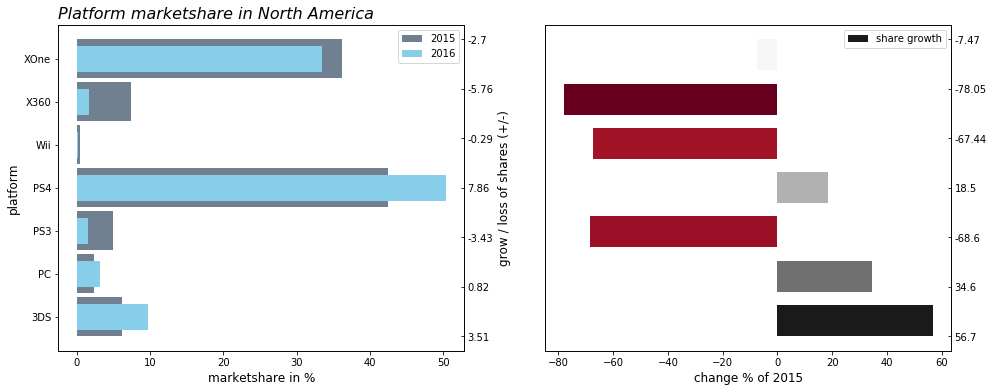

,platform,year_of_release,na_sales,share_2015,share_2016,change +/- of 2015,change % of 2015
0,3DS,2016.0,4.14,6.19,9.70,3.51,56.70
1,PC,2016.0,1.36,2.37,3.19,0.82,34.60
2,PS3,2016.0,0.67,5.00,1.57,-3.43,-68.60
3,PS4,2016.0,21.49,42.49,50.35,7.86,18.50
4,Wii,2016.0,0.06,0.43,0.14,-0.29,-67.44
5,X360,2016.0,0.69,7.38,1.62,-5.76,-78.05
6,XOne,2016.0,14.27,36.13,33.43,-2.7,-7.47


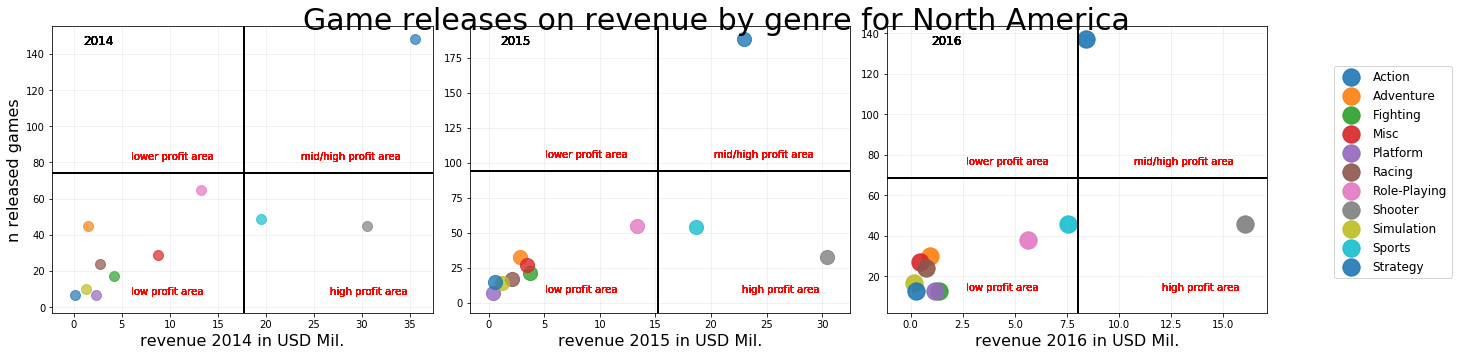


Top 5 genres in North America for 2014-2016:

2014:


,year_of_release,na_sales,genre,releases_count
0,2014.0,35.54,Action,148
23,2014.0,30.50,Shooter,45
29,2014.0,19.49,Sports,49
20,2014.0,13.26,Role-Playing,65
9,2014.0,8.75,Misc,29



2015:


,year_of_release,na_sales,genre,releases_count
24,2015.0,30.40,Shooter,33
1,2015.0,22.99,Action,188
30,2015.0,18.63,Sports,54
21,2015.0,13.33,Role-Playing,55
7,2015.0,3.70,Fighting,21



2016:


,year_of_release,na_sales,genre,releases_count
25,2016.0,16.07,Shooter,46
2,2016.0,8.43,Action,137
31,2016.0,7.54,Sports,46
22,2016.0,5.63,Role-Playing,38
8,2016.0,1.34,Fighting,13


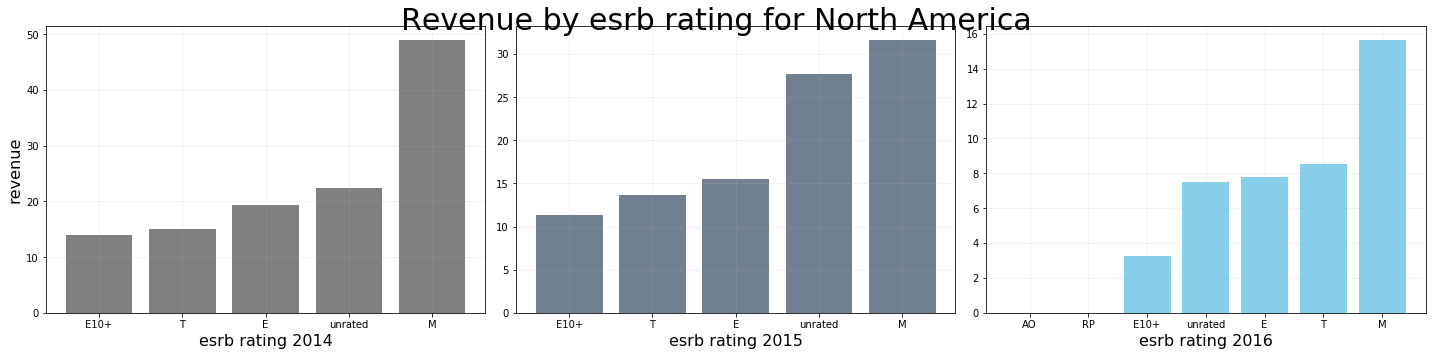

,year_of_release,na_sales,esrb_rating
7,2014.0,48.97,M
14,2014.0,22.39,unrated
1,2014.0,19.43,E
11,2014.0,14.97,T
4,2014.0,14.03,E10+


,year_of_release,na_sales,esrb_rating
8,2015.0,31.62,M
15,2015.0,27.72,unrated
2,2015.0,15.46,E
12,2015.0,13.62,T
5,2015.0,11.29,E10+


,year_of_release,na_sales,esrb_rating
9,2016.0,15.64,M
13,2016.0,8.53,T
3,2016.0,7.77,E
16,2016.0,7.49,unrated
6,2016.0,3.25,E10+







Top 10 sold games in 2014-2016 in North America



2014:



,name,platform,genre,na_sales
0,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,Role-Playing,4.35
1,Grand Theft Auto V,PS4,Action,3.96
2,Super Smash Bros. for Wii U and 3DS,3DS,Fighting,3.27
3,Call of Duty: Advanced Warfare,XOne,Shooter,3.22
4,Call of Duty: Advanced Warfare,PS4,Shooter,2.81
5,Grand Theft Auto V,XOne,Action,2.81
6,Call of Duty: Advanced Warfare,X360,Shooter,2.77
7,Destiny,PS4,Shooter,2.49
8,Assassin's Creed: Unity,XOne,Action,2.27
9,Destiny,XOne,Shooter,2.14


XOne    4
PS4     3
3DS     2
X360    1
Name: platform, dtype: int64


2015:



,name,platform,genre,na_sales
0,Call of Duty: Black Ops 3,PS4,Shooter,6.03
1,Call of Duty: Black Ops 3,XOne,Shooter,4.59
2,Star Wars Battlefront (2015),PS4,Shooter,2.99
3,Halo 5: Guardians,XOne,Shooter,2.78
4,Gears of War: Ultimate Edition,XOne,Shooter,2.61
5,Fallout 4,PS4,Role-Playing,2.53
6,Fallout 4,XOne,Role-Playing,2.51
7,NBA 2K16,PS4,Sports,2.49
8,Madden NFL 16,PS4,Sports,2.34
9,Madden NFL 16,XOne,Sports,2.08


PS4     5
XOne    5
Name: platform, dtype: int64


2016:



,name,platform,genre,na_sales
0,Pokemon Sun/Moon,3DS,Role-Playing,2.98
1,Uncharted 4: A Thief's End,PS4,Shooter,1.85
2,Call of Duty: Infinite Warfare,PS4,Shooter,1.61
3,Call of Duty: Infinite Warfare,XOne,Shooter,1.46
4,Tom Clancy's The Division,PS4,Shooter,1.35
5,Tom Clancy's The Division,XOne,Shooter,1.29
6,Battlefield 1,XOne,Shooter,1.28
7,NBA 2K17,PS4,Sports,1.25
8,Madden NFL 17,PS4,Sports,1.25
9,Battlefield 1,PS4,Shooter,1.10


PS4     6
XOne    3
3DS     1
Name: platform, dtype: int64

In [85]:
user_profile('na_sales')

<a id='NA-CON1'></a>
<a id='NA-CON2'></a>

### 5.2.2 Conclusion

#### Market Share:

The market shares in North America developed in favor of the PS4, PC and 3DS, with the PS4 still showing the largest, absolute increase in shares.

Although the XOne is one of the newer platforms, it lost 7.47% of its share in 2016.

It also shows that the shares of old platforms decrease as soon as the successor models are on the same market.


#### Revenue by Genre:
The 3 top-selling genres in the North American market consistently over 3 years are shooter, action and sports.
RPGs and fighting games should also be mentioned, but they are not in the same league as the genres mentioned above.

The ratio between action and shooter genres is striking: 2-5 times as many action games are launched as shooter game titles. Nevertheless, the trend shows that shooter games bring in almost twice as much revenue as action games, with an upward tendency.

#### Revenue by ESRB rating
Most sales are made by games with an ersb rating of "M".


#### Forecast on development prediction
Speaking of our Forecast for 2017 for the North American Market,
it's obvious that PS4 and PC are goign to be the dominant platforms, while the genres
Shooter, Action & Sports are the Ones to look out for.

What is undoubtedly worrying, however, is the steady decline in sales by an average of -36,98% year over year.
Looking at the revenue decline from 2014 to 2015, we will see a drop in revenue by -16,76%. This drop trebled from 2015 to 2016, as the drop in revenue is -57,19%.

[Back to top](#top) | [Back to Chapterstart: User Profile](#UserProfile2)

<a id='UPEU1'></a>
<a id='UPEU2'></a>

<a id='NA-CON1'></a>
<a id='NA-CON2'></a>

## 5.3 User Profile: Europe

<a id='EU-Dash1'></a>
<a id='EU-Dash2'></a>

### 5.3.1 Dashboard



User Profile for Europe





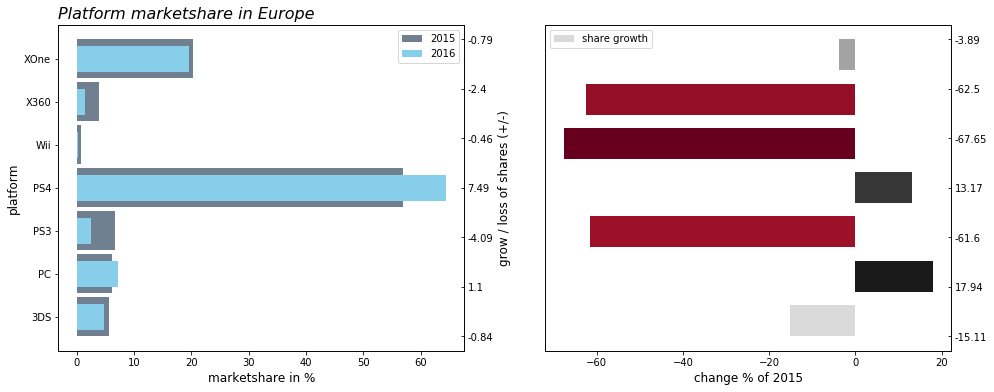

,platform,year_of_release,eu_sales,share_2015,share_2016,change +/- of 2015,change % of 2015
0,3DS,2016.0,2.33,5.56,4.72,-0.84,-15.11
1,PC,2016.0,3.57,6.13,7.23,1.1,17.94
2,PS3,2016.0,1.26,6.64,2.55,-4.09,-61.60
3,PS4,2016.0,31.78,56.86,64.35,7.49,13.17
4,Wii,2016.0,0.11,0.68,0.22,-0.46,-67.65
5,X360,2016.0,0.71,3.84,1.44,-2.4,-62.50
6,XOne,2016.0,9.63,20.29,19.50,-0.79,-3.89


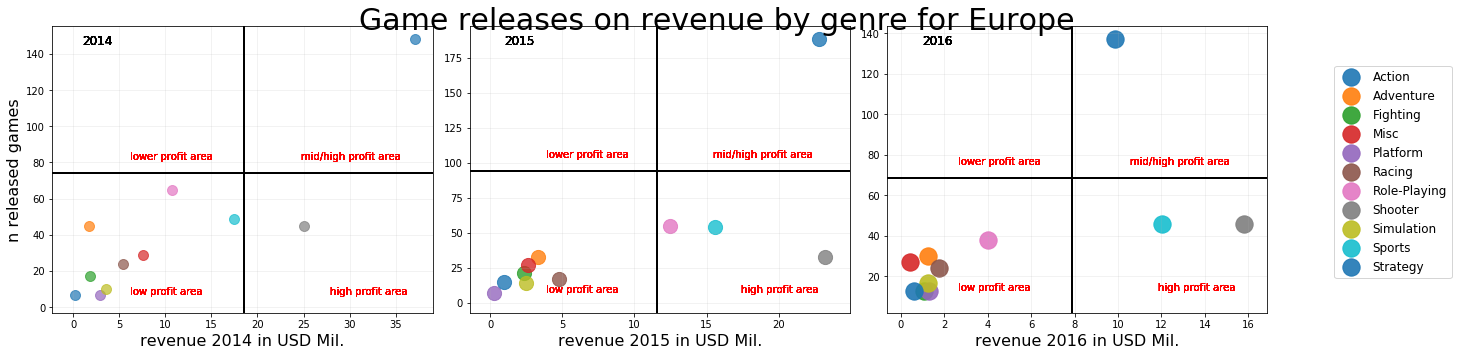


Top 5 genres in Europe for 2014-2016:

2014:


,year_of_release,eu_sales,genre,releases_count
0,2014.0,37.11,Action,148
23,2014.0,25.08,Shooter,45
29,2014.0,17.42,Sports,49
20,2014.0,10.70,Role-Playing,65
9,2014.0,7.57,Misc,29



2015:


,year_of_release,eu_sales,genre,releases_count
24,2015.0,23.20,Shooter,33
1,2015.0,22.82,Action,188
30,2015.0,15.60,Sports,54
21,2015.0,12.50,Role-Playing,55
18,2015.0,4.75,Racing,17



2016:


,year_of_release,eu_sales,genre,releases_count
25,2016.0,15.80,Shooter,46
31,2016.0,12.01,Sports,46
2,2016.0,9.85,Action,137
22,2016.0,4.00,Role-Playing,38
19,2016.0,1.77,Racing,24


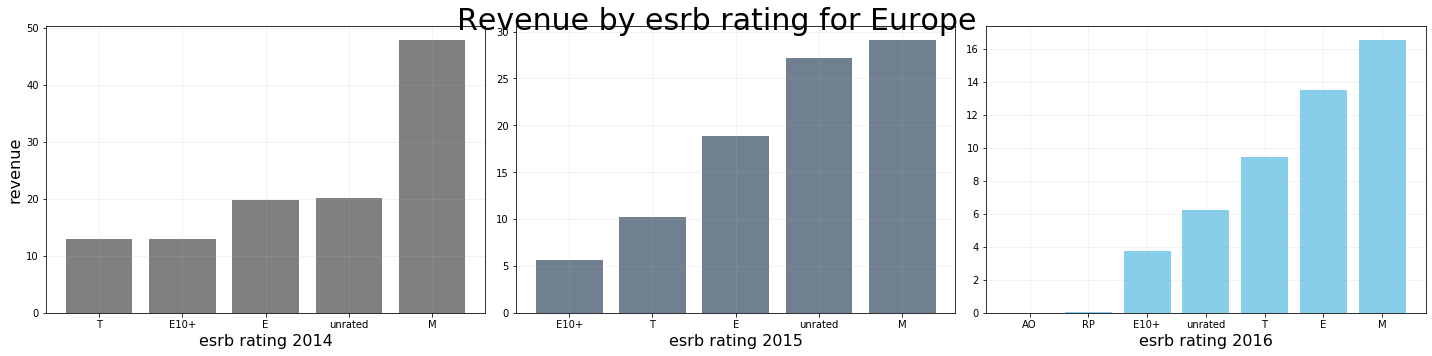

,year_of_release,eu_sales,esrb_rating
7,2014.0,47.88,M
14,2014.0,20.07,unrated
1,2014.0,19.77,E
4,2014.0,12.96,E10+
11,2014.0,12.95,T


,year_of_release,eu_sales,esrb_rating
8,2015.0,29.09,M
15,2015.0,27.20,unrated
2,2015.0,18.85,E
12,2015.0,10.23,T
5,2015.0,5.66,E10+


,year_of_release,eu_sales,esrb_rating
9,2016.0,16.52,M
3,2016.0,13.48,E
13,2016.0,9.42,T
16,2016.0,6.20,unrated
6,2016.0,3.73,E10+







Top 10 sold games in 2014-2016 in Europe



2014:



,name,platform,genre,eu_sales
0,Grand Theft Auto V,PS4,Action,6.31
1,FIFA 15,PS4,Sports,4.33
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,Role-Playing,3.49
3,Call of Duty: Advanced Warfare,PS4,Shooter,3.48
4,FIFA 15,PS3,Sports,3.02
5,Minecraft,PS3,Misc,2.37
6,Grand Theft Auto V,XOne,Action,2.19
7,Far Cry 4,PS4,Shooter,2.18
8,Destiny,PS4,Shooter,2.07
9,Assassin's Creed: Unity,PS4,Action,2.07


PS4     6
PS3     2
3DS     1
XOne    1
Name: platform, dtype: int64


2015:



,name,platform,genre,eu_sales
0,FIFA 16,PS4,Sports,6.12
1,Call of Duty: Black Ops 3,PS4,Shooter,5.86
2,Star Wars Battlefront (2015),PS4,Shooter,3.49
3,Fallout 4,PS4,Role-Playing,3.27
4,The Witcher 3: Wild Hunt,PS4,Role-Playing,2.13
5,FIFA 16,XOne,Sports,2.12
6,Call of Duty: Black Ops 3,XOne,Shooter,2.11
7,Assassin's Creed Syndicate,PS4,Action,1.99
8,FIFA 16,PS3,Sports,1.84
9,Uncharted: The Nathan Drake Collection,PS4,Action,1.71


PS4     7
XOne    2
PS3     1
Name: platform, dtype: int64


2016:



,name,platform,genre,eu_sales
0,FIFA 17,PS4,Sports,5.75
1,Uncharted 4: A Thief's End,PS4,Shooter,2.50
2,Battlefield 1,PS4,Shooter,2.15
3,FIFA 17,XOne,Sports,2.05
4,Call of Duty: Infinite Warfare,PS4,Shooter,2.00
5,Tom Clancy's The Division,PS4,Shooter,1.70
6,Pokemon Sun/Moon,3DS,Role-Playing,1.45
7,Far Cry: Primal,PS4,Action,1.25
8,Mafia III,PS4,Action,1.08
9,Overwatch,PS4,Shooter,0.85


PS4     8
3DS     1
XOne    1
Name: platform, dtype: int64

In [86]:
user_profile('eu_sales')

<a id='EU-CON1'></a>
<a id='EU-CON2'></a>

### 5.3.2 Conclusion

#### Market Share:

The market shares in Europe developed in favor of the PS4 and PC, with the PS4 still showing the largest, absolute increase in shares.

Although the XOne is one of the newer platforms, it lost 3.89% of its share in 2016.

It also shows that the shares of old platforms decrease as soon as the successor models are on the same market.


#### Revenue by Genre:
The 3 top-selling genres in the European market consistently over 3 years are shooter, action and sports.
RPGs and racing games should also be mentioned, but they are not in the same league as the genres mentioned above.

The ratio between action and shooter genres in Europe isn't as signifcant as the one in North America, the similarities still exists.

#### Revenue by ESRB rating
Most sales are made by games with an ersb rating of "M".


#### Forecast on development prediction
Speaking of our Forecast for 2017 for the European Market,
it's obvious that PS4 and PC are goign to be the dominant platforms, while the genres
Shooter, Action & Sports are the Ones to look out for.

What is undoubtedly worrying, however, is the steady decline in sales by an average of -34,94% year over year.
Looking at the revenue decline from 2014 to 2015, we will see a drop in revenue by -24,09%. This drop almost dobbled from 2015 to 2016, as the drop in revenue is -45,79%.

[Back to top](#top) | [Back to Chapterstart: User Profile](#UserProfile2)

<a id='UPJP1'></a>
<a id='UPJP2'></a>

## 5.4 User Profile: Japan

<a id='JP-Dash1'></a>
<a id='JP-Dash2'></a>

### 5.4.1 Dashboard

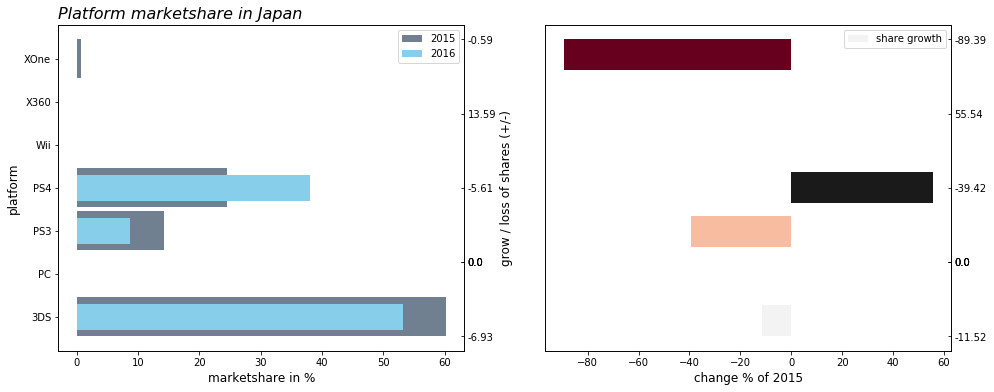

,platform,year_of_release,jp_sales,share_2015,share_2016,change +/- of 2015,change % of 2015
0,3DS,2016.0,8.03,60.18,53.25,-6.93,-11.52
1,PC,2016.0,0.00,0.00,0.00,0.0,0.00
2,PS3,2016.0,1.30,14.23,8.62,-5.61,-39.42
3,PS4,2016.0,5.74,24.47,38.06,13.59,55.54
4,Wii,2016.0,0.00,0.00,0.00,0.0,0.00
5,X360,2016.0,0.00,0.00,0.00,0.0,0.00
6,XOne,2016.0,0.01,0.66,0.07,-0.59,-89.39


In [87]:
randomness1 = games_clean_sv3.query('year_of_release >= 2014')

radar_values_at_test = randomness1.groupby(['platform','year_of_release'])['na_sales', 'eu_sales', 'jp_sales']\
                            .agg('sum')\
                            .reset_index()




reg_share= radar_values_at_test['year_of_release'].to_frame()
reg_share['jp_sales'] = radar_values_at_test['jp_sales']            
reg_share['platform'] = radar_values_at_test['platform']
reg_share


reg_share_year_list = reg_share['year_of_release'].unique().tolist()
reg_share_platform_list = radar_values_at_test['platform'].unique().tolist()


for element in reg_share_year_list:
    
    reg_share['share'] = reg_share.query('year_of_release == 2014.0')['jp_sales'] / reg_share.query('year_of_release == 2014.0')['jp_sales'].sum().round(2) * 100
    reg_share['share1'] = reg_share.query('year_of_release == 2015.0')['jp_sales'] / reg_share.query('year_of_release == 2015.0')['jp_sales'].sum().round(2) * 100
    reg_share['share2'] = reg_share.query('year_of_release == 2016.0')['jp_sales'] / reg_share.query('year_of_release == 2016.0')['jp_sales'].sum().round(2) * 100
    
    
reg_share['share'].fillna(reg_share['share1'], inplace= True)
reg_share['share'].fillna(reg_share['share2'], inplace= True)
reg_share.drop(columns=['share1', 'share2'], inplace= True)
reg_share['share %']= reg_share['share'].round(2)
    
    
reg_share_for_plot = reg_share.query('year_of_release >= 2014').reset_index()
reg_share_for_plot = reg_share_for_plot.drop('index', axis= 1)
    
reg_share_for_plot_list = reg_share_for_plot['platform'].unique().tolist()
    
    

    
    
    
share_2015 = reg_share_for_plot.query('year_of_release == 2015').reset_index()
    

share_2015 = share_2015.drop(share_2015[share_2015['platform']== 'PSP'].index).reset_index()

    
    
    
share_2015 = share_2015.drop('index',  axis= 1)
    
    
share_2016 = reg_share_for_plot.query('year_of_release == 2016').reset_index()
share_2016 = share_2016.drop('index',  axis= 1)
    
    
    
share_2015_list = share_2015['share %'].to_frame()
share_2016_test = share_2016
share_2016_test['share_2015'] = share_2015_list
    
share_2016_test['+/-'] = share_2016_test['share %'] - share_2016_test['share_2015']
share_2016_test['+/-'] = share_2016_test['+/-'].round(2)
    
share_2016_test['change % of 2015'] = ((share_2016_test['share %'] / share_2016_test['share_2015']) -1)*100
share_2016_test['change % of 2015'] = share_2016_test['change % of 2015'].round(2)

share_2016_test['change % of 2015'] = share_2016_test['change % of 2015'].fillna(0)


    
first_datalabel = share_2016_test['platform'].tolist()
datavalue_2015 = share_2016_test['share_2015'].tolist()
datavalue_2016 = share_2016_test['share %'].tolist()
    
    
            
    
share_2016_test['+/-'] = share_2016_test['+/-'].astype('str')
datavalue_twiny = share_2016_test['+/-'].tolist()
    
    
change_2015_frame = share_2016_test['change % of 2015'].to_frame()
change_2015_frame['change % of 2015'] = change_2015_frame['change % of 2015'].astype('str')
datavalue_twiny2 = change_2015_frame['change % of 2015'].tolist()
    
        
    ##form the table for displaying the values
display_share_2016_test = share_2016_test
display_share_2016_test = display_share_2016_test.drop(columns= 'share', axis= 1)
display_share_2016_test.rename(columns={'share %':'share_2016','+/-':'change +/- of 2015' }, inplace= True)
    
display_share_2016_test_rearranged = display_share_2016_test[display_share_2016_test.columns[[2,0,1,4,3,5,6]]]



plt.figure(figsize=(16, 6))

ax1 = plt.subplot(1,2,1)

ax1.barh(first_datalabel, datavalue_2015, height=0.9, color= 'slategray', label= '2015')
ax1.barh(first_datalabel, datavalue_2016,  height=0.6, color= 'skyblue', label= '2016')

ax1.set_ylabel('platform', size= 12)
ax1.set_xlabel('marketshare in %', size= 12)

ax2 = ax1.twinx()
ax2.plot(datavalue_twiny, linestyle='None')
ax2.set_yticks(datavalue_twiny)
ax2.tick_params(axis ='y', which= 'major', direction= 'in')
ax2.set_ylabel('grow / loss of shares (+/-)', size= 12)
             
plt.title(label= 'Platform marketshare in Japan',
         loc= 'left',
         fontstyle= 'oblique',
         size= 16)
plt.suptitle("")
ax1.legend()



    # for change chart

cmap = plt.cm.RdGy
norm = plt.Normalize(vmin = share_2016_test['change % of 2015'].min(),
                        vmax = share_2016_test['change % of 2015'].max())
    
z = np.array(share_2016_test['change % of 2015'])    

bx = plt.subplot(1,2,2)
bx.barh(first_datalabel, share_2016_test['change % of 2015'],
        height=0.7, color= cmap(norm(z)), label= 'share growth')

bx.set_yticks('')
bx.set_xlabel('change % of 2015', size= 12)

bx2 = bx.twinx()
bx2.plot(datavalue_twiny2, linestyle='None')
bx2.set_yticks(datavalue_twiny2)
bx2.tick_params(axis ='y', which= 'major', direction= 'in')

bx.legend()

plt.show()


display(display_share_2016_test_rearranged)



User Profile for Japan







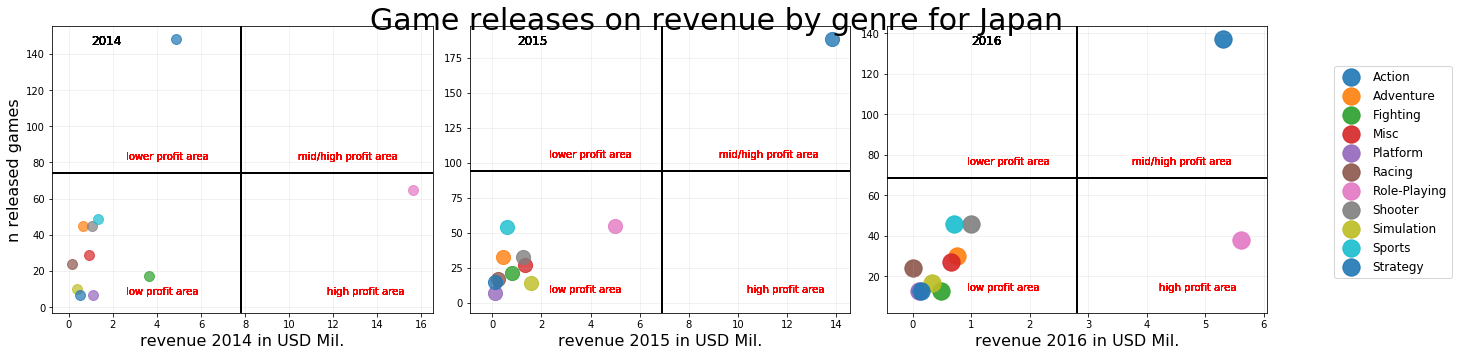


Top 5 genres in Japan for 2014-2016:

2014:


,year_of_release,jp_sales,genre,releases_count
20,2014.0,15.60,Role-Playing,65
0,2014.0,4.86,Action,148
6,2014.0,3.66,Fighting,17
29,2014.0,1.33,Sports,49
12,2014.0,1.10,Platform,7



2015:


,year_of_release,jp_sales,genre,releases_count
1,2015.0,13.83,Action,188
21,2015.0,5.00,Role-Playing,55
27,2015.0,1.57,Simulation,14
10,2015.0,1.34,Misc,27
24,2015.0,1.27,Shooter,33



2016:


,year_of_release,jp_sales,genre,releases_count
22,2016.0,5.61,Role-Playing,38
2,2016.0,5.30,Action,137
25,2016.0,0.99,Shooter,46
5,2016.0,0.75,Adventure,30
31,2016.0,0.71,Sports,46


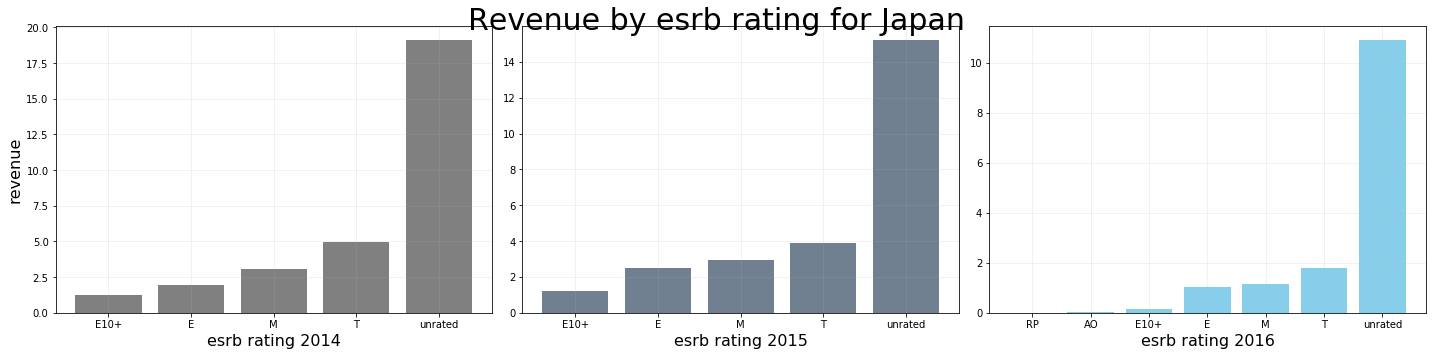

,year_of_release,jp_sales,esrb_rating
14,2014.0,19.12,unrated
11,2014.0,4.94,T
7,2014.0,3.10,M
1,2014.0,1.93,E
4,2014.0,1.28,E10+


,year_of_release,jp_sales,esrb_rating
15,2015.0,15.22,unrated
12,2015.0,3.89,T
8,2015.0,2.97,M
2,2015.0,2.52,E
5,2015.0,1.19,E10+


,year_of_release,jp_sales,esrb_rating
16,2016.0,10.90,unrated
13,2016.0,1.80,T
9,2016.0,1.17,M
3,2016.0,1.02,E
6,2016.0,0.15,E10+







Top 10 sold games in 2014-2016 in Japan



2014:



,name,platform,genre,jp_sales
0,Yokai Watch 2 Ganso/Honke,3DS,Role-Playing,3.18
1,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,Role-Playing,3.10
2,Yokai Watch 2 Shinuchi,3DS,Role-Playing,2.68
3,Monster Hunter 4 Ultimate,3DS,Role-Playing,2.62
4,Super Smash Bros. for Wii U and 3DS,3DS,Fighting,2.43
5,Dragon Quest Monsters 2,3DS,Role-Playing,0.79
6,Kirby: Triple Deluxe,3DS,Platform,0.79
7,Dark Souls II,PS3,Role-Playing,0.40
8,Mobile Suit Gundam: Extreme VS Full Boost,PS3,Fighting,0.38
9,Grand Theft Auto V,PS4,Action,0.38


3DS    7
PS3    2
PS4    1
Name: platform, dtype: int64


2015:



,name,platform,genre,jp_sales
0,Monster Hunter X,3DS,Action,2.79
1,Yokai Watch Busters,3DS,Action,2.29
2,Animal Crossing: Happy Home Designer,3DS,Simulation,1.40
3,Monster Strike 3DS,3DS,Action,0.87
4,Dragon Quest VIII: Journey of the Cursed King,3DS,Role-Playing,0.86
5,Rhythm Heaven: The Best+,3DS,Misc,0.72
6,Fire Emblem Fates,3DS,Role-Playing,0.52
7,Metal Gear Solid V: The Phantom Pain,PS4,Action,0.49
8,Dragon Quest Heroes: The World's Tree Woe and ...,PS3,Action,0.49
9,The Legend of Zelda: Majora's Mask 3D,3DS,Action,0.47


3DS    8
PS4    1
PS3    1
Name: platform, dtype: int64


2016:



,name,platform,genre,jp_sales
0,Pokemon Sun/Moon,3DS,Role-Playing,2.26
1,Yokai Watch 3,3DS,Action,1.33
2,Dragon Quest Monsters Joker 3,3DS,Role-Playing,0.63
3,Yokai Sangokushi,3DS,Action,0.56
4,Kirby: Planet Robobot,3DS,Action,0.47
5,Persona 5,PS4,Role-Playing,0.37
6,Dark Souls III,PS4,Role-Playing,0.34
7,Dragon Quest Heroes II: Twin Kings and the Pro...,PS4,Action,0.28
8,Monster Hunter Stories,3DS,Action,0.28
9,Ace Attorney 6,3DS,Adventure,0.27


3DS    7
PS4    3
Name: platform, dtype: int64

In [88]:
user_profile('jp_sales')

<a id='JP-CON1'></a>
<a id='JP-CON2'></a>

### 5.4.2 Conclusion

#### Market Share:

The market shares in Japan developed in favor of the PS4, as it still showing the largest, absolute increase in shares.

Although the XOne is one of the newer platforms, it lost 89,93% of its share in 2016.

It also shows that the shares of old platforms decrease as soon as the successor models are on the same market.


#### Revenue by Genre:
The 3 top-selling genres in the Japan consistently over 3 years are Role Playing, Action and Shooter.

Role Play Games are without a doubt the dominant Genre of this Market.

#### Revenue by ESRB rating
Most sales are made by games with an ersb rating of "Unrated".


#### Forecast on development prediction
Speaking of our Forecast for 2017 for the Japanese Market,
it's obvious that PS4 and PC are goign to be the dominant platforms, while the genres
Role Playing & Action are the Ones to look out for.

What is undoubtedly worrying, however, is the steady decline in sales by an average of -34,94% year over year.
Looking at the revenue decline from 2014 to 2015, we will see a drop in revenue by -15,08%. This drop almost dobbled from 2015 to 2016, as the drop in revenue is -27,69%.

[Back to top](#top) | [Back to Chapterstart: User Profile](#UserProfile2)

<a id='Global1'></a>
<a id='Global2'></a>

### 5.5 Global comparisson for platform preferences

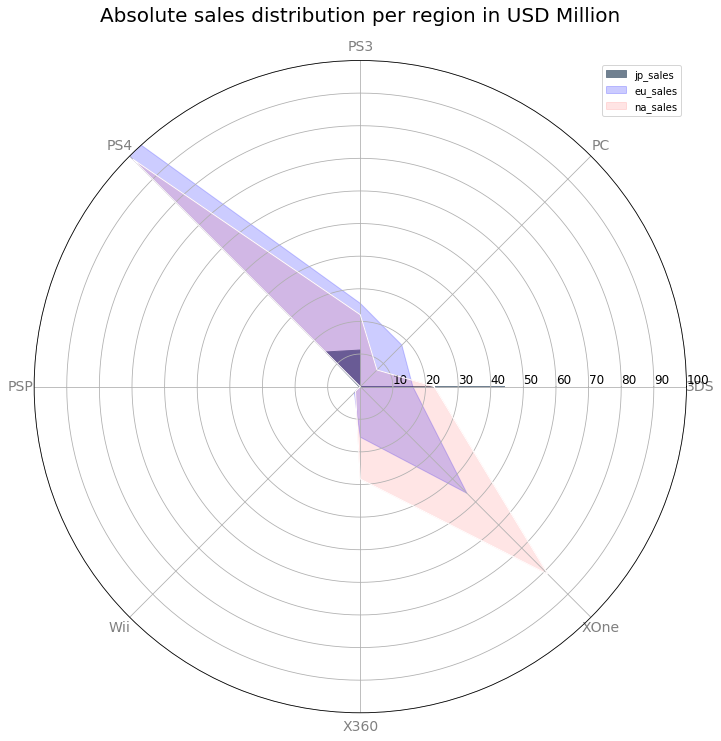

platform,3DS,PC,PS3,PS4,PSP,Wii,X360,XOne
region,,,,,,,,
na_sales,22.64,7.23,22.05,98.61,0.00,2.08,28.30,81.27
eu_sales,16.12,18.02,25.54,130.04,0.00,2.59,15.49,46.25
jp_sales,44.24,0.00,11.22,15.02,0.36,0.00,0.08,0.32


In [89]:
current_game_period = games_clean_sv3.query('year_of_release >= 2014')
radar_values = current_game_period.groupby('platform')['na_sales', 'eu_sales', 'jp_sales']\
                            .agg('sum')\
                            #.reset_index()


#swap columns and rows
radar_values_swap = radar_values.transpose()

# The attributes we want to use in our radar plot.
platforms1 = games_clean_sv3['platform'].unique().tolist()






# number of variable
categories=list(radar_values_swap)
N = len(categories)



radar_values_swap['region'] = ['na_sales','eu_sales','jp_sales']
radar_values_swap.reset_index(drop = True, inplace = True)
rvs_new = radar_values_swap
#rvs_new.drop(columns= platforms1, axis= 1, inplace= True)
rvs_new.set_index('region', inplace= True)


radar_values_swap1 = rvs_new.loc['na_sales'].tolist()
radar_values_swap2 = rvs_new.loc['eu_sales'].tolist()
radar_values_swap3 = rvs_new.loc['jp_sales'].tolist()


# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = radar_values_swap1
values += values[:1]
values

# für eu_sales
values1 = radar_values_swap2
values1 += values1[:1]
values1


# für jp sales
values2 = radar_values_swap3
values2 += values2[:1]
values2


# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


# Initialise the spider plot
fig, ax = plt.subplots(figsize=(16, 12), subplot_kw=dict(polar=True))

 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=14)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50,60,70,80,90,100],
           ["10","20","30","40","50","60","70","80","90","100"], color="black", size=12)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid', color= 'white')
#ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values2, 'b',  color= 'slategray', label= 'jp_sales')
ax.fill(angles, values1, 'b', alpha=0.2, color= 'blue', label= 'eu_sales')
ax.fill(angles, values, 'b', alpha=0.1, color= 'red', label= 'na_sales')
ax.legend()
ax.set_title('Absolute sales distribution per region in USD Million', size= 20)

# Show the graph
plt.show()
display(radar_values_swap)

<a id='Glo-CON1'></a>
<a id='Glo-CON2'></a>

### 5.5.1 Conclusion

The Chart above visualizes the platform preferences of the respected market on a total scale, including the years 2014 to 2016. As seen in the respective Dashboards, PS4 is the dominant current platform, followed by XOne. 

<a id='UP-CH-CON1'></a>
<a id='UP-CH-CON2'></a>

### 5.6 Chapter Conlcusion

While each market has their specifications, they all have two things in common:
1. PS4 is the dominant platform
2. Each region looses revenue on each year. On average 33,20% YoY

[Back to top](#top) | [Back to Chapterstart: User Profile](#UserProfile2)

---

<a id='Hypo1'></a>
<a id='Hypo2'></a>

## 6. Hypothese testing

#### Quicklinks

[6.1 Sample testing](#HYPO-Sample2)  <br>
[6.2 Wilcoxon-Mann-Whitney function](#HYPO-function2) <br>
>[6.2.1 Hypothesis - Xbox One and PC (platform)](#HYPO-platform2) <br>
>[6.2.2 Hypothesis - Action and Sports (genre)](#HYPO-genre2) <br>

—Average user ratings of the Xbox One and PC platforms are the same.
—Average user ratings for the Action and Sports genres are different.
Set the alpha threshold value yourself.
Explain:
—How you formulated the null and alternative hypotheses
—What significance level you chose to test the hypotheses, and why

<a id='HYPO-Sample1'></a>
<a id='HYPO-Sample2'></a>

### 6.1 Sample testing

We are going to test hypotheses on the average **user_score** for different sample groups. First, let's find out if the samples are distributed normally so we can decide on a test method.

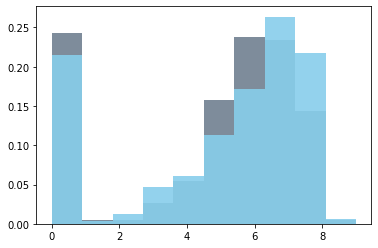

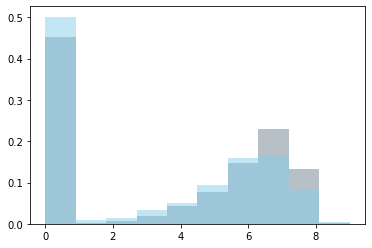

In [90]:
games_clean_sv3['user_score'] = games_clean_sv3['user_score'].astype('float')

xone_score = games_clean_sv3[(games_clean_sv3['platform'] == 'XOne')\
                           & (games_clean_sv3['user_score'] != 'unknown')]\
                            ['user_score'].astype('int')
pc_score = games_clean_sv3[(games_clean_sv3['platform'] == 'PC')\
                            & (games_clean_sv3['user_score'] != 'unknown')]\
                            ['user_score'].astype('int')

plt.hist(xone_score, density = True, color = 'slategray', alpha = 0.9)
plt.hist(pc_score, density = True, color = 'skyblue', alpha = 0.9)
plt.show()


action_score = games_clean_sv3[(games_clean_sv3['genre'] == 'Action')\
                           & (games_clean_sv3['user_score'] != 'unknown')]\
                            ['user_score'].astype('int')
sports_score = games_clean_sv3[(games_clean_sv3['genre'] == 'Sports')\
                            & (games_clean_sv3['user_score'] != 'unknown')]\
                            ['user_score'].astype('int')

plt.hist(action_score, density = True, color = 'slategray', alpha = 0.5)
plt.hist(sports_score, density = True, color ='skyblue', alpha = 0.5)

plt.show()

We can see that the distribution for all our samples are almost skewed to the left. So we can't assume a normal distribution for our samples. For this kind of distribution the Student's ttest won't work properly. We will choose the *Wilcoxon-Mann-Whitney test* that let's us compare two independet samples, not dependend on the distribution of their values.

Let's define a function that will perform the *Wilcoxon-Mann-Whitney test* for us and print some other interesting results like the mean and standard variance. We will set the alpha value or *significance level* to 0.05, alowing a 5% chance the result of our test does still not have enough statistical significance to reject or not reject our hypothesis. 5% is the standard value for many branches. We would only need to lower it if we were working for example in the medical field where we can't allow any error margins.

<a id='HYPO-function1'></a>
<a id='HYPO-function2'></a>

### 6.2 Wilcoxon-Mann-Whitney function

In [91]:
def hypothesis(column, sample_group_1, sample_group_2):
    print('Parameter:',column)

    groups = [sample_group_1, sample_group_2]
    alpha = 0.05 # critical statistical significance level
                            # if the p-value is less than alpha, we reject the hypothesis
        
    sample_array_1 = games_clean_sv3[games_clean_sv3[column] == sample_group_1]['user_score']
    sample_array_2 = games_clean_sv3[games_clean_sv3[column] == sample_group_2]['user_score']
    
    # Carrying out the Wilcoxon–Mann–Whitney test and printing results
    results = mannwhitneyu(sample_array_1, sample_array_2)
    results
    print()
    print('p-value: {:.3f}'.format(results.pvalue))

    # deciding whether we reject or not reject the null hypotheses based on pvalue and alpha
    if (results.pvalue < alpha):
            print("We reject the null hypothesis")
    else:
            print("We can't reject the null hypothesis")
    
    # calculating and printing additional info on mean, variance and standard deviation
    for group in groups:
        mean = games_clean_sv3[games_clean_sv3[column]==group]['user_score'].mean()
        variance = np.var(games_clean_sv3[games_clean_sv3[column]==group]['user_score'])
        std = np.std(games_clean_sv3[games_clean_sv3[column]==group]['user_score'])
        print()
        print('Sample Group:', group)
        print('Mean: {:.2f}'.format(mean))
        print('Variance: {:.2f}'.format(variance))
        print('Standard deviation: {:.2f}'.format(std))

<a id='HYPO-platform1'></a>
<a id='HYPO-platform2'></a>

### 6.2.1 Hypothesis - Xbox One and PC (platform)

**H<sub>0</sub>** = The average user ratings of the Action and Sports genres are the same <br>
**H<sub>1</sub>** = The average user ratings of the Action and Sports genres are different

In [92]:
hypothesis('platform', 'XOne', 'PC')

Parameter: platform

p-value: 0.009
We reject the null hypothesis

Sample Group: XOne
Mean: 5.14
Variance: 8.88
Standard deviation: 2.98

Sample Group: PC
Mean: 5.46
Variance: 9.03
Standard deviation: 3.01


With the help of the *Wilcoxon-Mann-Whitney test* we calculated the *p-value* at **0.009**. This is way higher than our set *alpha* of **0.05** so we will reject the null hypothesis. This means that we have strong grounds to believe that the `user_rating` from **XOne** and **PC** users is different. 

<a id='HYPO-genre1'></a>
<a id='HYPO-genre2'></a>

### 6.2.2 Hypothesis - Action and Sports (genre)

**H<sub>0</sub>** = The average user ratings of the Action and Sports genres are the same <br>
**H<sub>1</sub>** = The average user ratings of the Action and Sports genres are different

In [93]:
hypothesis('genre', 'Action', 'Sports')

Parameter: genre

p-value: 0.000
We reject the null hypothesis

Sample Group: Action
Mean: 4.04
Variance: 12.31
Standard deviation: 3.51

Sample Group: Sports
Mean: 3.50
Variance: 11.46
Standard deviation: 3.38


We used our function to find out whether there is a statistical difference in `user_rating` for games in the `genre` **Action** and **Sports**.

The *p-value* was calculated at less than **0.000** so we reject our null hypothesis that the reviews are equal for both ratings.

[Back to top](#top) | [Back to Chapterstart: Hypthesis testing](#Hypo2)

---

<a id='final_concl'></a>

## 7. Final Conclusion

We analyzed the given data, which contained the game sales of the past years. Due to the nature of that data, we could only make our assumption based the historical data. Now when it comes to our task, to predict the revenue for the next business year and thus, provide a forecast as an Analyst, we cant ignore the sudden drop in revenue from `publisher` **Nintendo**.

Such purchasing behaivior is usually caused by an deflation, summoned by an announcement of a better product.
Speaking of our task, it would be wise to include API calls from social media platforms, on which plublisher like Nintendo announce new products:
I.e. Twitter: https://twitter.com/NintendoAmerica/status/791455799302246400?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E791455799302246400%7Ctwgr%5E%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fwww.theverge.com%2F2016%2F10%2F26%2F13431334%2Fnintendo-switch-information-coming-next-year

I created also a Google Trend chart to proof the point:
https://trends.google.de/trends/explore?date=2016-10-01%202017-12-31&q=Nintendo%20Switch


So, when determining the revenue for the upcoming year 2017, games with the following indicators should be considered to sell in order to archive a devent revenue for 2017:

- platform:     PS4, XOne, NSwitch
- Genre:        Shooter, Action, Sports, RPG 
- ESRB- Rating: M

Also, we should keep in mind of the decreasing revenue year over year.

[Back to top](#top) 